In [1]:
import sqlite3
from sqlite3 import Error
from sqlite3 import IntegrityError
from ipyfilechooser import FileChooser
import matplotlib.pyplot as plt
import pandas as pd
import io
import requests
import numpy
import seaborn as sns
from scipy import stats
import math
from scipy.stats import ttest_ind
from tqdm import tqdm

# Just some visualization stuff

In [2]:
starting_directory = '/Volumes'
Tstat_chooser = FileChooser(starting_directory)
display(Tstat_chooser)

FileChooser(path='/Volumes', filename='', title='', show_hidden=False, select_desc='Select', change_desc='Chan…

In [6]:
screen_tstat = pd.read_csv(Tstat_chooser.selected, index_col=0).reset_index(drop=False)
print(screen_tstat)

      Gene  Morphwidth   Midline      Area  Instantaneous Speed  \
0  F56C9.1   -0.550141 -0.057219 -0.524565            -0.890867   
1       N2    0.000000  0.000000  0.000000             0.000000   
2  clec-51   -0.358449 -0.409470 -0.838980            -1.104352   
3  clec-52   -0.582108 -0.580745 -1.364625            -1.069907   
4    dog-1   -0.754679 -0.882768 -2.612111            -0.888537   
5   let-19    2.140802 -3.076947 -2.955586            -2.785313   
6    tbx-2   -1.128544 -0.470158 -1.590110             0.107964   
7    tlk-1   -0.331272 -1.377411 -1.607860             0.389837   

   Interval Speed  Angular Speed      Bias  Aspect Ratio      Kink  ...  \
0       -1.168996      -1.045356 -1.130467      0.052616  0.194780  ...   
1        0.000000       0.000000  0.000000      0.000000  0.000000  ...   
2       -1.865541      -1.664041 -1.163297     -0.324362 -0.311985  ...   
3       -1.164815      -0.593490 -1.469843     -0.514952 -0.652532  ...   
4       -1.418501    

In [8]:
screen_tstat_melt = pd.melt(screen_tstat.drop(columns=['Screen']), id_vars=['Gene'],var_name='Metric', value_name='T_score')
print(screen_tstat_melt)

        Gene                              Metric   T_score
0    F56C9.1                          Morphwidth -0.550141
1         N2                          Morphwidth  0.000000
2    clec-51                          Morphwidth -0.358449
3    clec-52                          Morphwidth -0.582108
4      dog-1                          Morphwidth -0.754679
..       ...                                 ...       ...
211  clec-52  Memory Retention of Response Speed -1.503455
212    dog-1  Memory Retention of Response Speed -1.089315
213   let-19  Memory Retention of Response Speed -2.972339
214    tbx-2  Memory Retention of Response Speed -1.436974
215    tlk-1  Memory Retention of Response Speed  0.242139

[216 rows x 3 columns]


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_60063/1439166575.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = screen_tstat_melt[screen_tstat_melt.Gene==f"{x}"],


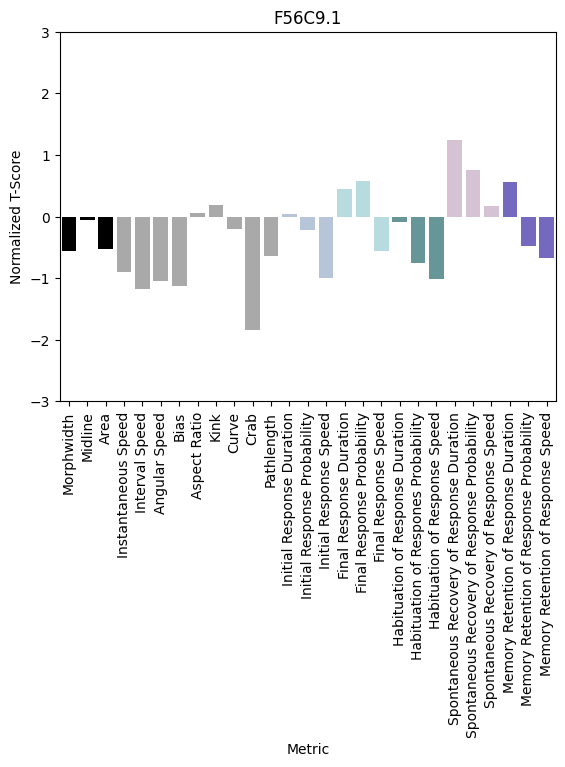

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_60063/1439166575.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = screen_tstat_melt[screen_tstat_melt.Gene==f"{x}"],


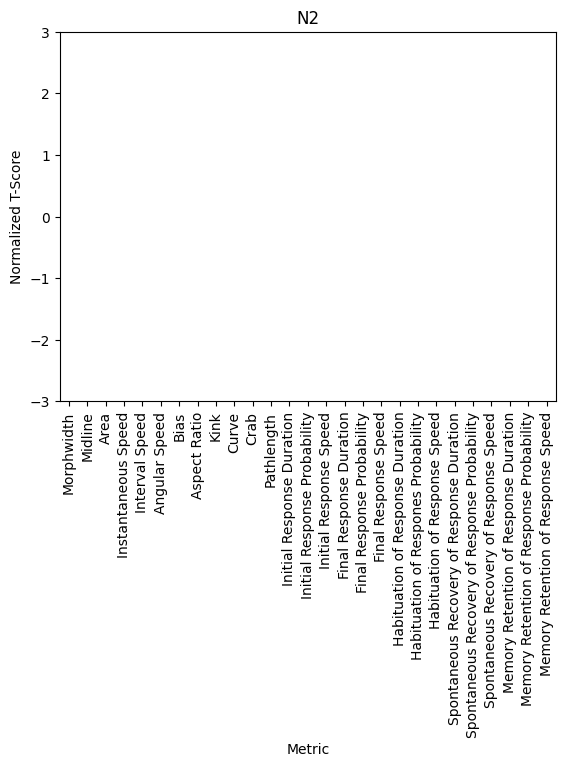

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_60063/1439166575.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = screen_tstat_melt[screen_tstat_melt.Gene==f"{x}"],


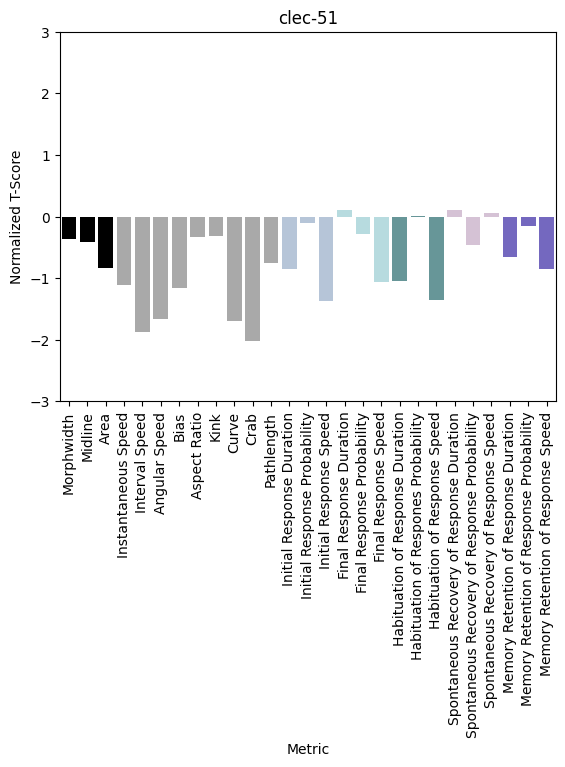

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_60063/1439166575.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = screen_tstat_melt[screen_tstat_melt.Gene==f"{x}"],


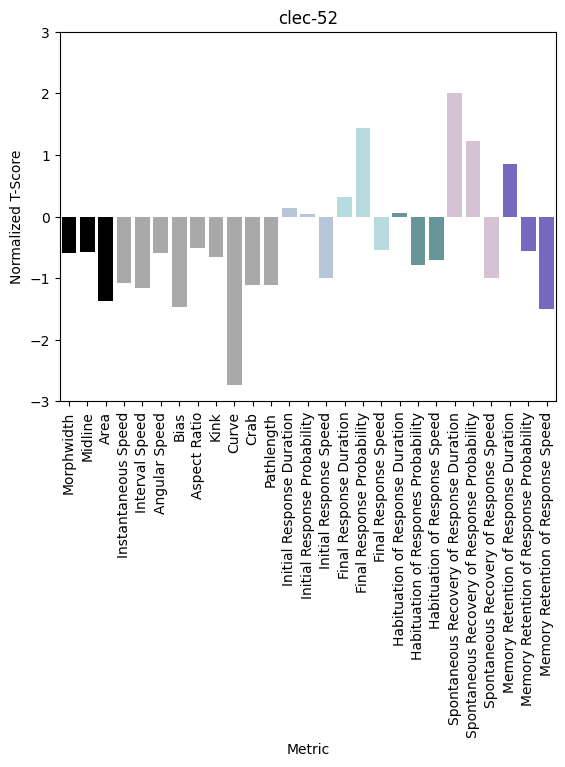

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_60063/1439166575.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = screen_tstat_melt[screen_tstat_melt.Gene==f"{x}"],


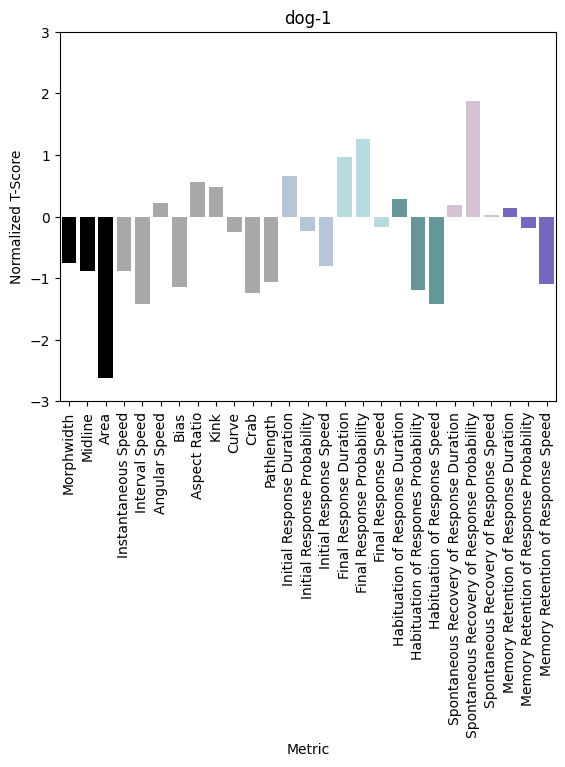

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_60063/1439166575.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = screen_tstat_melt[screen_tstat_melt.Gene==f"{x}"],


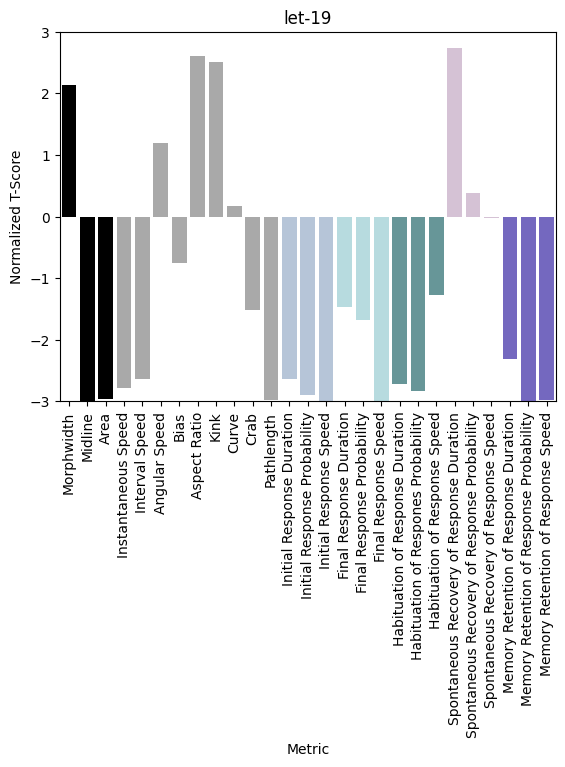

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_60063/1439166575.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = screen_tstat_melt[screen_tstat_melt.Gene==f"{x}"],


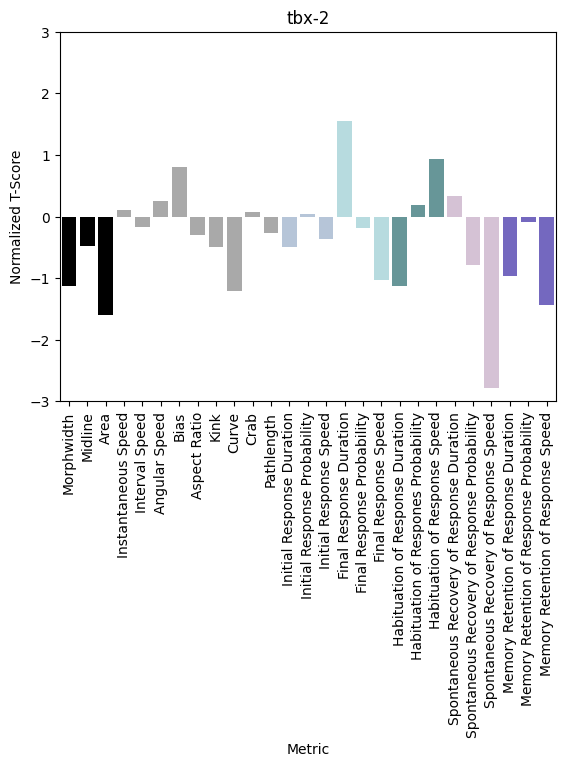

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_60063/1439166575.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = screen_tstat_melt[screen_tstat_melt.Gene==f"{x}"],


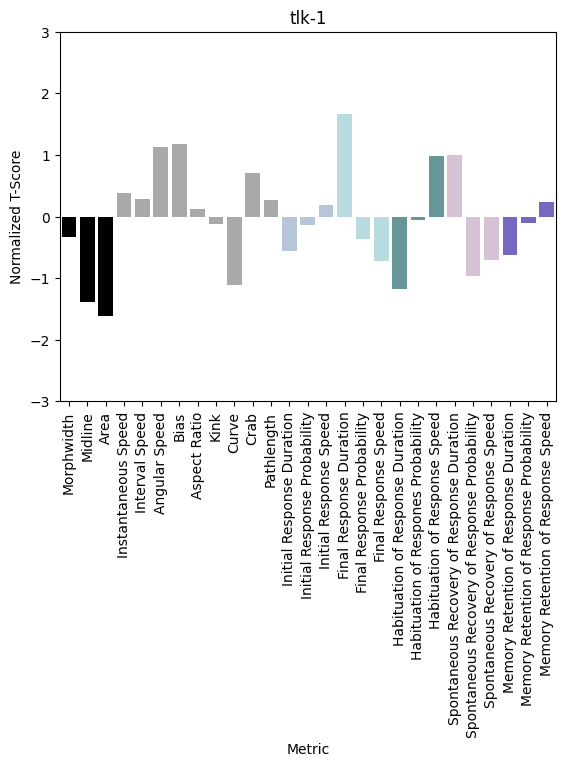

done


In [14]:
metric_palette = ["k", "k", "k",
                  "darkgray", "darkgray", "darkgray", "darkgray", "darkgray", "darkgray", "darkgray", "darkgrey","darkgray",
                  "lightsteelblue", "lightsteelblue", "lightsteelblue",
                  "powderblue", "powderblue", "powderblue",
                  "cadetblue", "cadetblue", "cadetblue",
                  "thistle", "thistle", "thistle",
                  "slateblue","slateblue","slateblue"]

for x in screen_tstat_melt.Gene.unique():
    plt.figure()
    ax = sns.barplot(data = screen_tstat_melt[screen_tstat_melt.Gene==f"{x}"], 
                y="T_score",
                x="Metric", orient='v',
                palette=metric_palette).set_title(f"{x}")
    plt.ylim(-3,3)
    plt.ylabel('Normalized T-Score')
    plt.xticks(rotation=90)
    plt.savefig(f'/Users/Joseph/Desktop/PD_Uncertain_Loci_Screen/locus71/{x}_Metrics.png', format='png', dpi=450, bbox_inches = "tight")
    plt.show()
print("done")

## Clustering Playtest

The below cells are for exploring clustering functionalities. Currently under development.

In [3]:
conn = sqlite3.connect('/Users/Joseph/Desktop/NRSC510B/mwt_data.db')
tstat_gene = pd.read_sql_query(f"SELECT * FROM tstat_gene_data", conn)
conn.close()

In [11]:
# conn=sqlite3.connect('/Users/Joseph/Desktop/NRSC510B/mwt_data.db')
# # tap_output.to_sql('tap_response_data', conn, if_exists='append', index=False)
# # baseline_output.to_sql('tap_baseline_data', conn, if_exists='replace', index=False)
# # tstat_gene.to_sql('tstat_gene_data', conn, if_exists='replace', index=False)
# # combined_Tstats_normalize_allele_2.reset_index().to_sql('tstat_allele_data', conn, if_exists='append', index=False)
# # combined_Tstats_normalized_melted.to_sql('gene_profile_data', conn, if_exists='append', index=False)
# # combined_Tstats_normalized_melted_allele.to_sql('allele_profile_data', conn, if_exists='append', index=False)
# # combined_MSD.to_sql('gene_MSD', conn, if_exists='append', index=False)
# # allele_combined_MSD.to_sql('allele_MSD', conn, if_exists='append', index=False)
# # combined_Tstats_melted_sorted.to_sql('allele_phenotype_data', conn, if_exists='replace', index=False)
# print(conn.total_changes)
# conn.close()


In [4]:
data = tstat_gene.drop(tstat_gene[tstat_gene.Gene == "N2"].index)
data = data.drop(columns=['Spontaneous Recovery of Response Duration',
                          'Spontaneous Recovery of Response Probability',
                          'Spontaneous Recovery of Response Speed'])
data_na = data.dropna().reset_index().drop(columns=['index'])
data_na.head(10)

Gene     Width    Length      Area  Instantaneous Speed  \
0    C29E4.10 -0.647055 -0.185658 -0.439891             0.902499   
1    F32D8.13  0.777410  0.113354  0.436028            -0.246369   
2     F53B2.5 -0.301572 -0.184646 -0.406214             2.560500   
3    F54B11.5 -0.833726 -0.436230 -0.755943             0.667368   
4     F55C5.7 -0.735903 -1.264234 -0.681969            -0.386983   
5    T08G11.1 -1.088150 -1.824558 -1.687120             0.171246   
6     T20F7.3 -0.503499 -0.469091 -0.470265            -0.185138   
7     W07B8.4 -0.576967 -0.620720 -0.424708             0.494724   
8     W07B8.5  0.387555  0.033065  0.424338            -0.055088   
9  Y18D10A.22 -0.809437 -0.772804 -0.691180            -0.002940   

   Interval Speed  Angular Speed      Bias  Aspect Ratio      Kink  ...  \
0        0.928335       1.204435  1.017620     -0.249281 -0.597715  ...   
1       -0.123728      -0.476608 -0.002676     -0.013489 -0.149009  ...   
2        1.611415       2.544994  2.637826      0.616906  0.196222  ...   
3        0.703403       0.875220  0.711684     -0.417555 -0.372645  ...   
4       -0.730350      -0.194881  0.192844     -0.376255 -0.629048  ...   
5        0.214668       0.781983  0.411728      1.001609  0.770279  ...   
6       -0.307934      -0.135628 -0.417237     -0.701360 -0.749175  ...   
7        0.273801       0.514285  0.502154     -0.545952 -0.977184  ...   
8       -0.314784       0.104489  0.021153     -0.086559 -0.487370  ...   
9       -0.070907      -0.273864  0.726390      0.084552 -0.173583  ...   

   Initial Response Duration  Initial Response Probability  \
0                  -0.382671                     -1.116753   
1                   0.496580                     -0.442789   
2                   0.880319                      0.359874   
3                  -0.220220                     -1.279735   
4                   2.599804                     -0.170001   
5                   0.348635                     -0.210835   
6                   0.274552                      0.248204   
7                   1.524722                      0.323142   
8                   1.338575                     -0.101845   
9                   0.752436                     -0.023713   

   Initial Response Speed  Final Response Duration  \
0                0.364692                -1.973002   
1               -0.432684                 0.196056   
2                1.192820                 1.398358   
3                0.368981                -0.094378   
4               -0.567830                 0.393475   
5                0.027378                -0.147517   
6               -0.098735                -2.066209   
7                1.324903                -0.623930   
8                0.501077                 0.331478   
9               -0.259683                 1.019924   

   Final Response Probability  Final Response Speed  \
0                   -0.538532             -0.441958   
1                   -0.567687              0.251047   
2                   -0.149340             -0.141870   
3                   -1.292243              0.214204   
4                    2.865312             -0.443459   
5                   -0.173955             -0.785603   
6                    0.799006             -1.561896   
7                    1.583315              0.471669   
8                    1.332169             -0.244955   
9                    0.445450             -0.737660   

   Habituation of Response Duration  Habituation of Respones Probability  \
0                          0.089889                            -1.065384   
1                          0.357877                             0.811631   
2                          0.151822                             0.550300   
3                         -0.199469                            -0.766943   
4                          1.819301                            -1.971032   
5                          0.362031                            -0.084357   
6                 

In [5]:
DOP_Genes=['cat-2','dop-3','bas-1','dat-1','dop-1','cat-1']

In [6]:
PARK_Genes=['T08G11.1',
            'djr-1.1',
            'djr-1.2',
            'ifg-1',
            'rme-8',
            'vps-35',
            'pdr-1',
            'pink-1',
            'lrk-1',
            'catp-6',
            'cats-7',
            'gba-1',
            'gba-2',
            'gba-4',
            'gba-3',
            'ubh-1',
            'ubh-2',
            'ubh-3',
            'gyf-1',
            'ipla-3',
            'unc-26']
print(PARK_Genes)

['T08G11.1', 'djr-1.1', 'djr-1.2', 'ifg-1', 'rme-8', 'vps-35', 'pdr-1', 'pink-1', 'lrk-1', 'catp-6', 'cats-7', 'gba-1', 'gba-2', 'gba-4', 'gba-3', 'ubh-1', 'ubh-2', 'ubh-3', 'gyf-1', 'ipla-3', 'unc-26']


In [7]:
for i in range(len(data_na)):
    if data_na.loc[i, "Gene"] in DOP_Genes:
        data_na.loc[i, "Screen"] = "DOPAMINE"

In [7]:
data_na.head(20)

Gene     Width    Length      Area  Instantaneous Speed  \
0     C29E4.10 -0.647055 -0.185658 -0.439891             0.902499   
1     F32D8.13  0.777410  0.113354  0.436028            -0.246369   
2      F53B2.5 -0.301572 -0.184646 -0.406214             2.560500   
3     F54B11.5 -0.833726 -0.436230 -0.755943             0.667368   
4      F55C5.7 -0.735903 -1.264234 -0.681969            -0.386983   
5     T08G11.1 -1.088150 -1.824558 -1.687120             0.171246   
6      T20F7.3 -0.503499 -0.469091 -0.470265            -0.185138   
7      W07B8.4 -0.576967 -0.620720 -0.424708             0.494724   
8      W07B8.5  0.387555  0.033065  0.424338            -0.055088   
9   Y18D10A.22 -0.809437 -0.772804 -0.691180            -0.002940   
10      acr-12 -0.199792 -0.452700 -0.333528            -0.208878   
11       acr-3  0.399610 -0.465177 -0.153709             0.267953   
12       acr-6 -0.021417 -0.660400 -0.257652             1.043999   
13       acr-8 -0.421746 -0.595702 -0.750707            -0.524781   
14       bas-1 -0.257987 -0.172294 -0.251692             2.930804   
15       cat-1 -0.610769 -1.338709 -0.964875             1.623617   
16       cat-2  0.770869  0.212302  0.437689             2.423529   
17       cat-4 -1.749028 -1.747868 -1.950869             2.877392   
18       chd-1 -0.025052 -0.471114 -0.235348             0.669615   
19       chd-7 -2.014033 -1.998739 -1.635833            -1.364381   

    Interval Speed  Angular Speed      Bias  Aspect Ratio      Kink  ...  \
0         0.928335       1.204435  1.017620     -0.249281 -0.597715  ...   
1        -0.123728      -0.476608 -0.002676     -0.013489 -0.149009  ...   
2         1.611415       2.544994  2.637826      0.616906  0.196222  ...   
3         0.703403       0.875220  0.711684     -0.417555 -0.372645  ...   
4        -0.730350      -0.194881  0.192844     -0.376255 -0.629048  ...   
5         0.214668       0.781983  0.411728      1.001609  0.770279  ...   
6        -0.307934      -0.135628 -0.417237     -0.701360 -0.749175  ...   
7         0.273801       0.514285  0.502154     -0.545952 -0.977184  ...   
8        -0.314784       0.104489  0.021153     -0.086559 -0.487370  ...   
9        -0.070907      -0.273864  0.726390      0.084552 -0.173583  ...   
10       -0.125431       0.234310  0.061017      0.442551  0.318159  ...   
11        0.416563       0.666302  0.038795      0.587041  0.376980  ...   
12        0.547322       0.762000  1.014067     -0.102404 -0.823069  ...   
13       -0.360127      -0.151881 -0.284031      0.059999 -0.142896  ...   
14        3.261641       3.372333  3.071462      1.850938  0.754623  ...   
15        2.167722       2.654368  1.622587      2.008550  1.854352  ...   
16        2.372219       2.600514  2.056884      2.071453  1.851331  ...   
17        2.438738       3.515619  3.757474      2.722807  2.446728  ...   
18        0.744157       0.777522  0.798941      0.499234  0.631043  ...   
19       -1.245361      -0.351876 -1.843128      0.101036  0.288945  ...   

    Initial Response Duration  Initial Response Probability  \
0                   -0.382671                     -1.116753   
1                    0.496580                     -0.442789   
2                    0.880319                      0.359874   
3                   -0.220220                     -1.279735   
4                    2.599804                     -0.170001   
5                    0.348635                     -0.210835   
6                    0.274552                      0.248204   
7                    1.524722                      0.323142   
8                    1.338575                     -0.101845   
9                    0.752436                     -0.023713   
10                   0.049264                     -0.025976   
11                  -0.647435                     -0.899327   
12                   0.867383                      0.677968   
13                  -0.048318                     -0.305326   
14                

# Playing with Feature Importance and Selection...

In [8]:
category = data_na.pop("Screen")
lut = dict(zip(category.unique(), "rbkkkk"))
row_colors = category.map(lut)
print(category)
print(category.unique())

0      PD_Screen
1      PD_Screen
2      PD_Screen
3      PD_Screen
4      PD_Screen
         ...    
638    PD_Screen
639    PD_Screen
640    PD_Screen
641    PD_Screen
642    PD_Screen
Name: Screen, Length: 643, dtype: object
['PD_Screen' 'DOPAMINE' 'ASD_Screen' 'Glia_Genes_Screen'
 'G-Proteins_Screen' 'Neuron_Genes_Screen']


In [9]:
gene_labels = data_na.pop("Gene")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


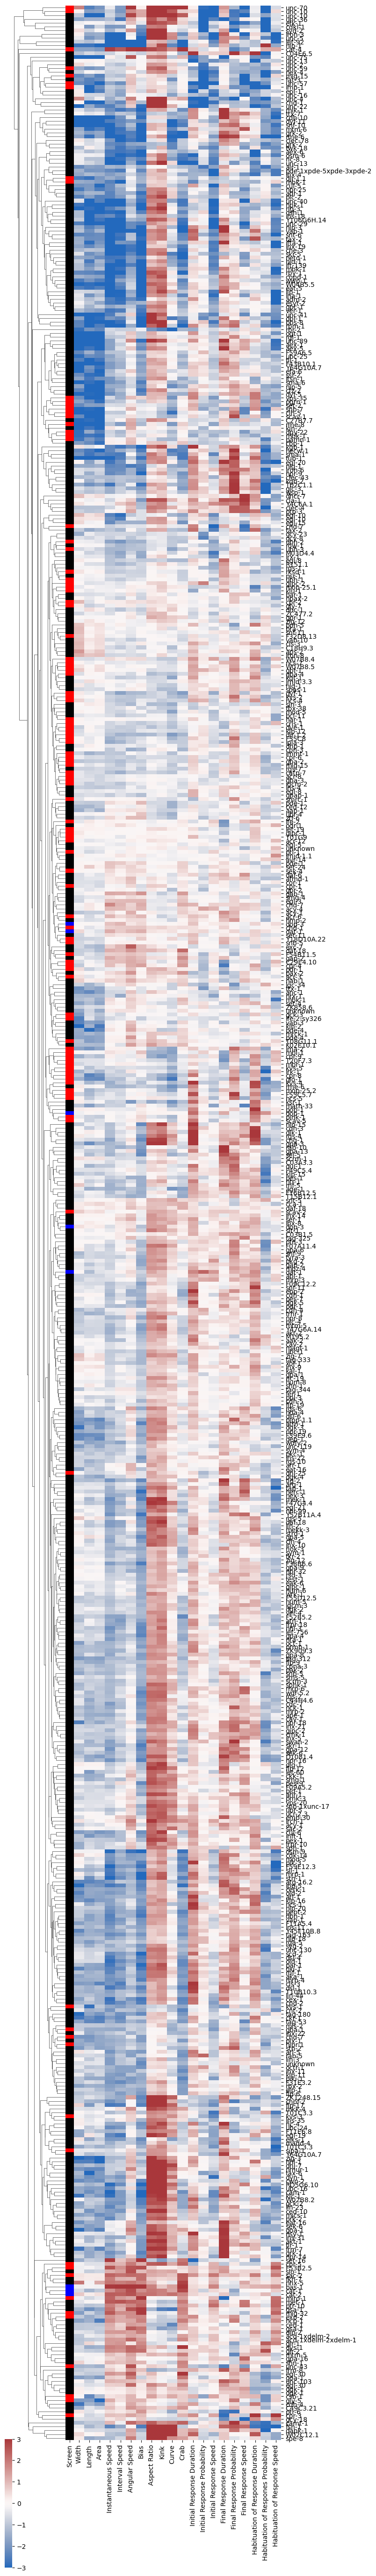

In [10]:
sns.clustermap(
    data_na,
    figsize=(8, 55),
    dendrogram_ratio=(0.2,0),
    cmap=sns.color_palette("vlag", as_cmap=True),
    vmax=3,
    vmin=-3,
    cbar_pos=(0, 0, 0.02, 0.05),
    row_colors=row_colors,
    # method = 'ward',
    # metric = 'canberra',
    row_cluster=True,
    col_cluster=False,
    yticklabels=gene_labels,
)

## Set Input (X) and Output (Y, Classification)

In [33]:
# making labels(Gene), X(features) and Y (target)
Y = category
# Y
X = data_na
# X
labels = gene_labels
# labels

X
Y

0      PD_Screen
1      PD_Screen
2      PD_Screen
3      PD_Screen
4      PD_Screen
         ...    
638    PD_Screen
639    PD_Screen
640    PD_Screen
641    PD_Screen
642    PD_Screen
Name: Screen, Length: 643, dtype: object

In [34]:
print(Y.unique())
Y = Y.replace("ASD_Screen", "Outgroup")
# Y = Y.replace("PD_Screen", "Outgroup") #Rerun kernel with this for in for ASD
Y = Y.replace("Glia_Genes_Screen", "Outgroup")
Y = Y.replace("G-Proteins_Screen", "Outgroup")
Y = Y.replace("Neuron_Genes_Screen", "Outgroup")
Y = Y.replace("DOPAMINE", "Outgroup")
print(Y.unique())

['PD_Screen' 'DOPAMINE' 'ASD_Screen' 'Glia_Genes_Screen'
 'G-Proteins_Screen' 'Neuron_Genes_Screen']
['PD_Screen' 'Outgroup']


## Oversample

### You want to make sure you oversample AFTER your train_test_split!! And only oversample the training set!!

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
from imblearn.over_sampling import SVMSMOTE
from collections import Counter

oversample = SVMSMOTE()
X_OS, Y_OS = oversample.fit_resample(X_train,Y_train)
# X_OS, Y_OS = oversample.fit_resample(X,Y)

counter = Counter(Y_OS)
counter_og = Counter(Y_train)

print(counter)
print(counter_og)

Counter({'Outgroup': 441, 'PD_Screen': 441})
Counter({'Outgroup': 441, 'PD_Screen': 73})


## Feature Importance from coefficients

In [40]:
def binaryize(inlist):
    newlist=inlist.copy()
    for i in range(len(newlist)):
        if newlist[i] == 'Outgroup':
            newlist[i] = 0
        if newlist[i] == 'PD_Screen':
            newlist[i] = 1
    return newlist


In [42]:
Y_convert = binaryize(Y)
Y_convert

0      1
1      1
2      1
3      1
4      1
      ..
638    1
639    1
640    1
641    1
642    1
Name: Screen, Length: 643, dtype: object

In [22]:
importance

array([0.02643517, 0.04729364, 0.02053341, 0.0570692 , 0.00648453,
       0.00115556, 0.05448821, 0.05858183, 0.05659698, 0.03259931,
       0.06534944, 0.01496581, 0.01180015, 0.03837071, 0.03432028,
       0.04675692, 0.06304099, 0.01545692, 0.02741389, 0.03457458])

<Axes: title={'center': 'Feature importances via coefficients'}, xlabel='Features'>

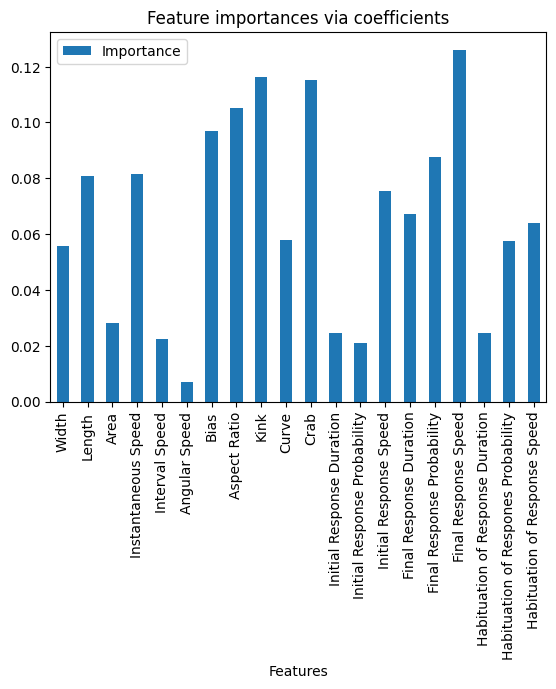

In [70]:
from sklearn.linear_model import RidgeClassifierCV
import numpy as np


ridge = RidgeClassifierCV().fit(X, Y)
importance = np.abs(ridge.coef_)

RidgeCV_FeatureImp_df = pd.DataFrame({"Features": X.columns, "Importance":importance[0]})
# RidgeCV_FeatureImp_df.set_index('Importances')
# RidgeCV_FeatureImp_df
RidgeCV_FeatureImp_df.plot.bar(x = 'Features', y='Importance', title = "Feature importances via coefficients")

# plt.show()

In [73]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=6, direction="forward",scoring='roc_auc'
).fit(X, Y)

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)

print(f"ROC AUC score: {roc_auc_score(Y, ridge.predict(X)[:, 1]):.3f}")

Features selected by forward sequential selection: ['Width' 'Length' 'Angular Speed' 'Bias' 'Kink' 'Final Response Speed']


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [32]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
638    1
639    1
640    1
641    1
642    1
Name: Screen, Length: 643, dtype: object

<Axes: title={'center': 'Feature importances via RandomForest'}, xlabel='Features'>

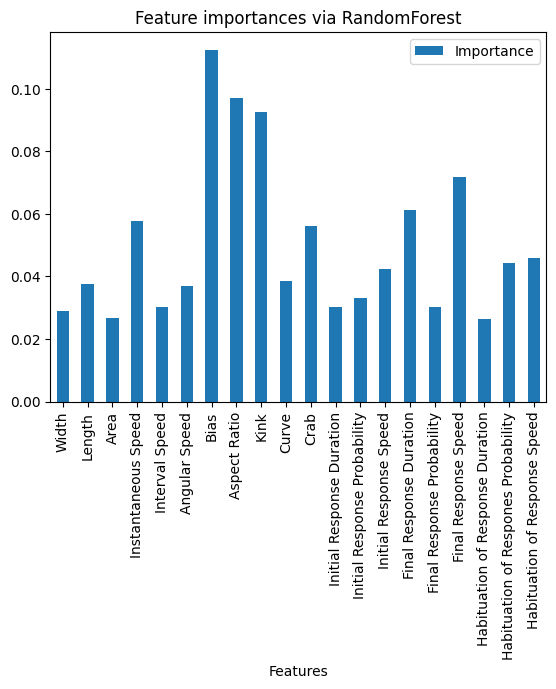

In [36]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(criterion="log_loss").fit(X, Y)

importance = randomforest.feature_importances_

randomforest_FeatureImp_df = pd.DataFrame({"Features": X.columns, "Importance":importance})
# RidgeCV_FeatureImp_df.set_index('Importances')
# RidgeCV_FeatureImp_df
randomforest_FeatureImp_df.plot.bar(x = 'Features', y='Importance', title = "Feature importances via RandomForest")

In [58]:
sfs_forward = SequentialFeatureSelector(
    randomforest, n_features_to_select=6, direction="forward",scoring='roc_auc'
).fit(X, Y)

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"ROC AUC score: {roc_auc_score(Y, randomforest.predict_proba(X)[:, 1]):.3f}")

Features selected by forward sequential selection: ['Bias' 'Kink' 'Crab' 'Initial Response Duration' 'Final Response Speed'
 'Habituation of Respones Probability']
ROC AUC score: 1.000


## SGD Classifier

In [56]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

sgd_classifier = SGDClassifier(loss="log_loss").fit(X, Y)

sfs_forward = SequentialFeatureSelector(
    sgd_classifier, n_features_to_select=6, direction="forward", scoring='roc_auc'
).fit(X, Y)

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)

print(f"ROC AUC score: {roc_auc_score(Y, sgd_classifier.predict_proba(X)[:, 1]):.3f}")

Features selected by forward sequential selection: ['Instantaneous Speed' 'Bias' 'Aspect Ratio' 'Kink'
 'Initial Response Speed' 'Final Response Speed']
ROC AUC score: 0.863


## Random Forrest Classifier

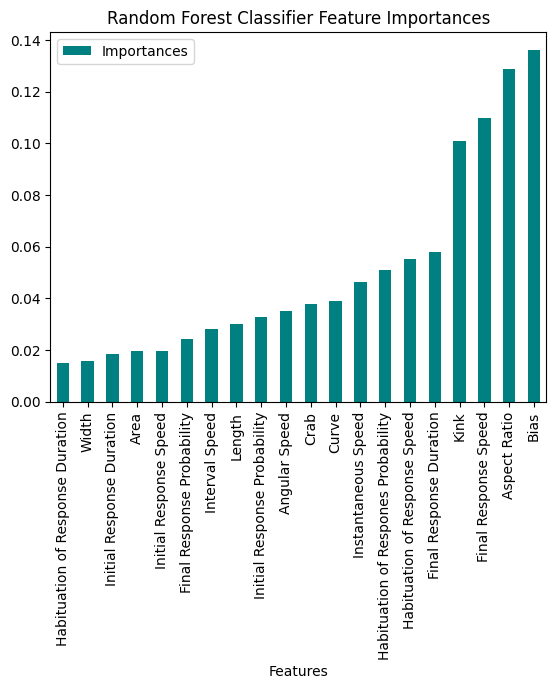

In [22]:
from sklearn.ensemble import RandomForestClassifier

# create random forest model with hyperparameters (keeping default to start)
model = RandomForestClassifier()
model.fit(X_OS, Y_OS)

# get the importance of the resulting features
importances = model.feature_importances_

# create a dataframe for visualization
final_df = pd.DataFrame({"Features": X.columns, "Importances":importances})
final_df.set_index('Importances')
# print(final_df)

# sort in ascending order to better visualzation
final_df = final_df.sort_values('Importances')

# plot the feature importance in bars
final_df.plot.bar(x = 'Features', y='Importances',color = 'teal', title = 'Random Forest Classifier Feature Importances')
plt.savefig('/Users/Joseph/Desktop/PD_RandomForestFeatureImportances.png', bbox_inches='tight')


## Information Gain

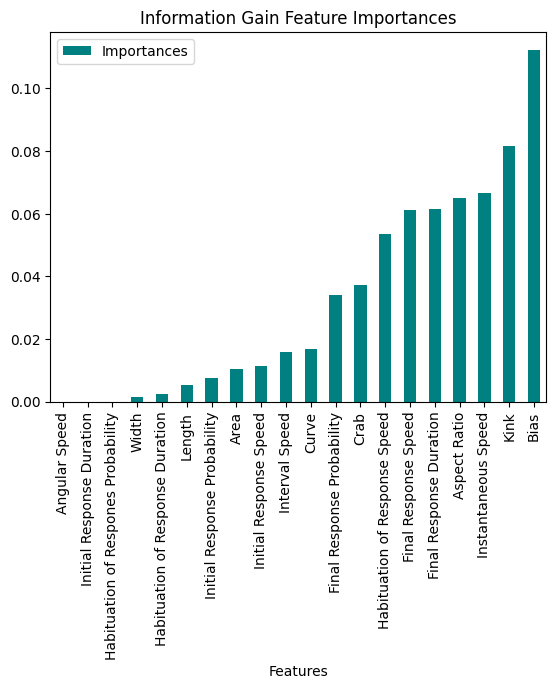

In [23]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X,Y)
# create a dataframe for visualization
final_df = pd.DataFrame({"Features": X.columns, "Importances":importances})
final_df.set_index('Importances')
# print(final_df)
# sort in ascending order to better visualzation
final_df = final_df.sort_values('Importances')
# plot the feature importance in bars
final_df.plot(kind='bar',x = 'Features', y='Importances',color = 'teal', title = "Information Gain Feature Importances")
plt.savefig('/Users/Joseph/Desktop/PD_InfoGainFeatureImportances.png', bbox_inches='tight')

## Fisher Score

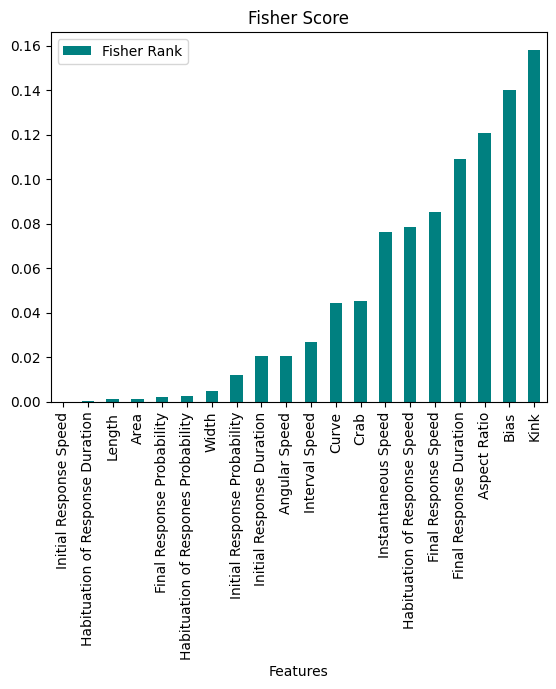

In [24]:
from skfeature.function.similarity_based import fisher_score
%matplotlib inline

ranks = fisher_score.fisher_score(X.to_numpy(),Y.to_numpy())

# create a dataframe for visualization
final_df = pd.DataFrame({"Features": X.columns, "Fisher Rank":ranks})
final_df.set_index('Fisher Rank')
# print(final_df)
# sort in ascending order to better visualzation
final_df = final_df.sort_values('Fisher Rank')
# plot the feature importance in bars
final_df.plot(kind='bar',x = 'Features', y='Fisher Rank',color = 'teal', title = "Fisher Score")
plt.savefig('/Users/Joseph/Desktop/PD_FisherScoreFeatureImportances.png', bbox_inches='tight')

## Univariate (ANOVA) Modeling

### k = 7~8 yields best results

In [83]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# # Generating a sample dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
oversample = SVMSMOTE()
X_train_OS, Y_train_OS = oversample.fit_resample(X_train,Y_train)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying ANOVA-based feature selection
k_best = 8  # Choose the number of top features you want to select
selector = SelectKBest(f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

# Displaying selected feature indices
selected_indices = np.where(selector.get_support())[0]
selected_features = X.columns[selected_indices]
print("Selected feature indices:", selected_indices)
print("Selected features:", selected_features)
# print(X_train_selected)
# Optionally, you can train a model on the selected features
# For example, using a simple classifier like Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train_selected, Y_train)
# Accuracy 0.8217054263565892

# model = LogisticRegression(random_state=42)  
# model.fit(X_train_selected, Y_train)
# Accuracy 0.7286821705426356

# Predicting on the test set
y_pred = model.predict(X_test_selected)

# Evaluating the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Selected feature indices: [ 3  6  7  8 10 14 16 19]
Selected features: Index(['Instantaneous Speed', 'Bias', 'Aspect Ratio', 'Kink', 'Crab',
       'Final Response Duration', 'Final Response Speed',
       'Habituation of Response Speed'],
      dtype='object')
Accuracy on the test set: 0.8062015503875969


## Forward Feature Selection

In [101]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# # Generating a sample dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
oversample = SVMSMOTE()
X_train_OS, Y_train_OS = oversample.fit_resample(X_train,Y_train)


# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_OS)
X_Test = scaler.transform(X_test)

# Applying ANOVA-based feature selection
k_best = 6  # Choose the number of top features you want to select
selector = SelectKBest(f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, Y_OS)
X_test_selected = selector.transform(X_test)

# Displaying selected feature indices
selected_indices = np.where(selector.get_support())[0]
selected_features = X.columns[selected_indices]
print("Selected feature indices:", selected_indices)
print("Selected features:", selected_features)
# print(X_train_selected)
# Optionally, you can train a model on the selected features
# For example, using a simple classifier like Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# model = RandomForestClassifier()
# model.fit(X_train_selected, Y_train_OS)
# Accuracy 0.8217054263565892

model = LogisticRegression(random_state=42)  
model.fit(X_train_selected, Y_train_OS)
# Accuracy 0.7286821705426356

# Predicting on the test set
y_pred = model.predict(X_test_selected)

# Evaluating the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Selected feature indices: [ 6  7  8 14 16 19]
Selected features: Index(['Bias', 'Aspect Ratio', 'Kink', 'Final Response Duration',
       'Final Response Speed', 'Habituation of Response Speed'],
      dtype='object')
Accuracy on the test set: 0.8372093023255814


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


In [52]:
len(Y_test)

129

## More involved algorithms (still forward feature selection, but this time using Random Forest)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def forward_feature_selection(X_train, X_test, Y_train, Y_test, model, max_features=10):
    """
    Forward Feature Selection
    """
    selected_features = []
    best_score = 0

    while len(selected_features) < max_features if max_features else X_train.shape[1]:
        remaining_features = [feature for feature in range(X_train.shape[1]) if feature not in selected_features]
        candidate_scores = []

        for feature in remaining_features:
            current_features = selected_features + [feature]
            model.fit(X_train[:, current_features], Y_train)
            y_pred = model.predict(X_test[:, current_features])
            score = accuracy_score(Y_test, y_pred)
            candidate_scores.append((feature, score))

        # Select the feature that gives the best score
        best_candidate = max(candidate_scores, key=lambda x: x[1])

        # Check if adding the feature improves the model
        if best_candidate[1] > best_score:
            selected_features.append(best_candidate[0])
            best_score = best_candidate[1]
        else:
            break

    return selected_features




#### Best Performer So Far - 6 features (90% Accuracy):
Bias, 
Kink, 
Final Response Speed, 
Angular Speed, 
Initial Response Speed, 
Area

In [109]:
# # Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
oversample = SVMSMOTE()
X_train_OS, Y_train_OS = oversample.fit_resample(X_train,Y_train)

# Standardizing the features
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_train_OS)
X_Test = scaler.transform(X_test)

# Using a simple classifier like RandomForestClassifier
model = RandomForestClassifier()

# Performing forward feature selection
selected_features = forward_feature_selection(X_Train, X_Test, Y_train_OS, Y_test, model)

print("Selected feature indices:", selected_features)
print("Selected features:", X.columns[selected_features])

# Optionally, you can train a model on the selected features
model.fit(X_Train[:, selected_features], Y_train_OS)
y_pred = model.predict(X_Test[:, selected_features])
y_prob = np.max(model.predict_proba(X_Test[:, selected_features]), axis=1)

# Evaluating the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# pred_conf = pd.DataFrame(np.array([y_pred, y_prob]), columns = ["Prediction", "Confidence"])
d = {'prediction': y_pred, 'confidence': y_prob, "class":Y_test}
df = pd.DataFrame(data=d)
print(df)
# print(pred_conf)

Selected feature indices: [8, 16, 6, 4, 14]
Selected features: Index(['Kink', 'Final Response Speed', 'Bias', 'Interval Speed',
       'Final Response Duration'],
      dtype='object')
Accuracy on the test set: 0.8914728682170543
    prediction  confidence      class
630  PD_Screen        0.87  PD_Screen
367   Outgroup        0.82   Outgroup
485   Outgroup        1.00   Outgroup
290   Outgroup        0.66   Outgroup
72   PD_Screen        0.70  PD_Screen
..         ...         ...        ...
346   Outgroup        0.99   Outgroup
641  PD_Screen        0.74  PD_Screen
215   Outgroup        0.51   Outgroup
606   Outgroup        0.99   Outgroup
135  PD_Screen        0.70   Outgroup

[129 rows x 3 columns]


In [91]:
len(X_Test)
Y_test

630    PD_Screen
367     Outgroup
485     Outgroup
290     Outgroup
72     PD_Screen
         ...    
346     Outgroup
641    PD_Screen
215     Outgroup
606     Outgroup
135     Outgroup
Name: Screen, Length: 129, dtype: object

In [139]:
import multiprocessing
multiprocessing.cpu_count()

8

In [132]:
from tqdm import tqdm
MonteCarlo = pd.DataFrame(columns=['Feature Indices','Feature Names','Accuracy'])
MonteCarlo['Feature Indices'] = MonteCarlo['Feature Indices'].astype('object')
MonteCarlo['Feature Names'] = MonteCarlo['Feature Names'].astype('object')

for i in tqdm(range(5000)):
    # # Splitting the dataset into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    oversample = SVMSMOTE()
    X_train_OS, Y_train_OS = oversample.fit_resample(X_train,Y_train)  
    # Standardizing the features
    scaler = StandardScaler()
    X_Train = scaler.fit_transform(X_train_OS)
    X_Test = scaler.transform(X_test)
    # Using a simple classifier like RandomForestClassifier
    model = RandomForestClassifier()
    # Performing forward feature selection
    selected_features = forward_feature_selection(X_Train, X_Test, Y_train_OS, Y_test, model)
    selected_feature_names = X.columns[selected_features]
    # print("Selected feature indices:", selected_features)
    # print("Selected features:", X.columns[selected_features])
    
    # Optionally, you can train a model on the selected features
    model.fit(X_Train[:, selected_features], Y_train_OS)
    y_pred = model.predict(X_Test[:, selected_features])
    y_prob = np.max(model.predict_proba(X_Test[:, selected_features]), axis=1)
    # Evaluating the model
    accuracy = accuracy_score(Y_test, y_pred)
    new_row = {'Feature Indices': set(selected_features),'Feature Names': set(selected_feature_names),'Accuracy': accuracy}
    # print(new_row)
    # print("Accuracy on the test set:", accuracy)
    MonteCarlo.loc[i] = new_row




100%|████████████████████████████████████| 5000/5000 [17:15:05<00:00, 12.42s/it]


Feature Indices  \
0      [6, 8, 16, 15, 2, 0]   
1            [6, 9, 16, 11]   
2            [16, 8, 3, 10]   
3             [16, 6, 8, 5]   
4             [16, 6, 8, 4]   
...                     ...   
4995  [6, 7, 16, 11, 10, 4]   
4996      [6, 9, 16, 17, 0]   
4997      [6, 16, 9, 2, 11]   
4998          [8, 16, 5, 4]   
4999  [8, 5, 16, 6, 14, 15]   

                                          Feature Names  Accuracy  
0     Index(['Bias', 'Kink', 'Final Response Speed',...  0.883721  
1     Index(['Bias', 'Curve', 'Final Response Speed'...  0.906977  
2     Index(['Final Response Speed', 'Kink', 'Instan...  0.883721  
3     Index(['Final Response Speed', 'Bias', 'Kink',...  0.891473  
4     Index(['Final Response Speed', 'Bias', 'Kink',...  0.891473  
...                                                 ...       ...  
4995  Index(['Bias', 'Aspect Ratio', 'Final Response...  0.875969  
4996  Index(['Bias', 'Curve', 'Final Response Speed'...  0.899225  
4997  Index(['Bias', 'Final Response Speed', 'Curve'...  0.906977  
4998  Index(['Kink', 'Final Response Speed', 'Angula...  0.860465  
4999  Index(['Kink', 'Angular Speed', 'Final Respons...  0.891473  

[5000 rows x 3 columns]

In [ ]:
MonteCarlo = pd.DataFrame(columns=['Feature Indices','Feature Names','Accuracy'])
MonteCarlo['Feature Indices'] = MonteCarlo['Feature Indices'].astype('object')
MonteCarlo['Feature Names'] = MonteCarlo['Feature Names'].astype('object')

In [143]:
import time

In [140]:
def run_sim():

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    oversample = SVMSMOTE()
    X_train_OS, Y_train_OS = oversample.fit_resample(X_train,Y_train)  
# Standardizing the features
    scaler = StandardScaler()
    X_Train = scaler.fit_transform(X_train_OS)
    X_Test = scaler.transform(X_test)
# Using a simple classifier like RandomForestClassifier
    model = RandomForestClassifier()
# Performing forward feature selection
    selected_features = forward_feature_selection(X_Train, X_Test, Y_train_OS, Y_test, model)
    selected_feature_names = X.columns[selected_features]
# print("Selected feature indices:", selected_features)
# print("Selected features:", X.columns[selected_features])

# Optionally, you can train a model on the selected features
    model.fit(X_Train[:, selected_features], Y_train_OS)
    y_pred = model.predict(X_Test[:, selected_features])
    y_prob = np.max(model.predict_proba(X_Test[:, selected_features]), axis=1)
# Evaluating the model
    accuracy = accuracy_score(Y_test, y_pred)
    new_row = {'Feature Indices': set(selected_features),'Feature Names': set(selected_feature_names),'Accuracy': accuracy}
# print(new_row)
# print("Accuracy on the test set:", accuracy)
    MonteCarlo.loc[i] = new_row

In [166]:
MonteCarlo = pd.DataFrame(columns=['Feature Indices','Feature Names','Accuracy'])
MonteCarlo['Feature Indices'] = MonteCarlo['Feature Indices'].astype('object')
MonteCarlo['Feature Names'] = MonteCarlo['Feature Names'].astype('object')

pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
for i in tqdm(range(5000)):
   pool.apply_async(run_sim(), callback = "")
pool.close()
pool.join()

MonteCarlo

100%|████████████████████████████████████| 5000/5000 [11:21:27<00:00,  8.18s/it]


Feature Indices                                      Feature Names  \
0     {0, 3, 6, 7, 9, 16}  {Curve, Final Response Speed, Instantaneous Sp...   
1          {8, 16, 6, 15}  {Final Response Probability, Final Response Sp...   
2       {2, 6, 8, 15, 16}  {Final Response Speed, Final Response Probabil...   
3        {0, 5, 6, 9, 16}  {Curve, Final Response Speed, Width, Bias, Ang...   
4          {16, 17, 6, 7}  {Aspect Ratio, Habituation of Response Duratio...   
...                   ...                                                ...   
4995    {1, 6, 8, 15, 16}  {Final Response Speed, Length, Final Response ...   
4996    {2, 6, 9, 16, 17}  {Curve, Final Response Speed, Bias, Habituatio...   
4997   {3, 8, 11, 15, 16}  {Final Response Speed, Instantaneous Speed, Fi...   
4998           {16, 9, 6}                {Curve, Final Response Speed, Bias}   
4999    {2, 6, 9, 11, 16}  {Curve, Final Response Speed, Bias, Initial Re...   

      Accuracy  
0     0.875969  
1     0.891473  
2     0.914729  
3     0.852713  
4     0.891473  
...        ...  
4995  0.883721  
4996  0.891473  
4997  0.860465  
4998  0.844961  
4999  0.860465  

[5000 rows x 3 columns]

In [151]:
MonteCarlo

Feature Indices  \
0              {16, 5, 6, 7}   
1             {8, 16, 13, 6}   
2          {6, 7, 9, 16, 17}   
3             {17, 10, 6, 7}   
4             {16, 8, 10, 3}   
5             {8, 16, 10, 6}   
6   {2, 5, 6, 8, 13, 15, 16}   
7              {16, 5, 6, 7}   
8      {5, 6, 8, 11, 13, 16}   
9             {8, 16, 6, 15}   
10            {16, 9, 11, 6}   
11            {17, 10, 6, 7}   
12             {16, 5, 6, 7}   
13          {2, 4, 6, 8, 16}   
14         {3, 8, 9, 10, 16}   
15             {16, 9, 6, 0}   

                                        Feature Names  Accuracy  
0   {Aspect Ratio, Angular Speed, Final Response S...  0.891473  
1   {Initial Response Speed, Final Response Speed,...  0.899225  
2   {Curve, Final Response Speed, Bias, Habituatio...  0.868217  
3   {Aspect Ratio, Habituation of Response Duratio...  0.868217  
4   {Kink, Instantaneous Speed, Final Response Spe...  0.883721  
5            {Crab, Final Response Speed, Kink, Bias}  0.883721  
6   {Final Response Speed, Final Response Probabil...  0.906977  
7   {Aspect Ratio, Angular Speed, Final Response S...  0.891473  
8   {Final Response Speed, Kink, Bias, Angular Spe...  0.899225  
9   {Final Response Probability, Final Response Sp...  0.891473  
10  {Initial Response Duration, Curve, Final Respo...  0.883721  
11  {Aspect Ratio, Habituation of Response Duratio...  0.860465  
12  {Aspect Ratio, Angular Speed, Final Response S...  0.875969  
13  {Final Response Speed, Kink, Bias, Area, Inter...  0.883721  
14  {Curve, Instantaneous Speed, Final Response Sp...  0.852713  
15         {Width, Curve, Final Response Speed, Bias}  0.899225

In [167]:
MonteCarlo.to_csv('/Users/Joseph/Desktop/PD_MonteCarloFeatureSelection_new.csv')

In [172]:
MonteCarlo_sort = MonteCarlo.sort_values(by=['Accuracy'])
MonteCarlo_sort = MonteCarlo_sort[MonteCarlo_sort.Accuracy >= 0.90]
MonteCarlo_sort

Feature Indices  \
1524     {6, 8, 10, 11, 16}   
39        {4, 6, 8, 14, 16}   
1587          {16, 8, 5, 6}   
1911         {8, 16, 6, 15}   
4613      {5, 6, 8, 13, 16}   
...                     ...   
4398          {16, 9, 6, 0}   
1037     {6, 9, 10, 11, 16}   
3756         {16, 9, 11, 6}   
756   {5, 6, 8, 14, 15, 16}   
3329     {6, 9, 11, 16, 17}   

                                          Feature Names  Accuracy  
1524  {Final Response Speed, Kink, Bias, Initial Res...  0.906977  
39    {Final Response Speed, Final Response Duration...  0.906977  
1587  {Angular Speed, Kink, Final Response Speed, Bias}  0.906977  
1911  {Final Response Probability, Final Response Sp...  0.906977  
4613  {Final Response Speed, Kink, Bias, Angular Spe...  0.906977  
...                                                 ...       ...  
4398         {Width, Curve, Final Response Speed, Bias}  0.922481  
1037  {Curve, Final Response Speed, Bias, Initial Re...  0.922481  
3756  {Initial Response Duration, Curve, Final Respo...  0.930233  
756   {Final Response Speed, Final Response Probabil...  0.930233  
3329  {Curve, Final Response Speed, Bias, Habituatio...  0.930233  

[476 rows x 3 columns]

#1 - {6,9,11,16,17} - Curve, Final Response Speed, Bias, Habituation of Response Duration, Initial Response Duration



#2 - {5,6,8,13,16} - Final Response Speed, Kink, Bias, Angular Speed, Initial Response Speed

In [136]:
# MonteCarlo.to_csv('/Users/Joseph/Desktop/PD_MonteCarloFeatureSelection.csv')

## For selected features from feature selection processes above:

In [75]:
selected_features = [5,6,8,13,16]
print("Selected feature indices: ", selected_features)

Selected feature indices:  [5, 6, 8, 13, 16]


In [80]:
# For CIHR GRANT
from imblearn.over_sampling import SVMSMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# selected_features = [6,8,0,17,15,9,3]
# selected_features = [6,9,16,7,5]
# selected_features = [6,7,3]

print("Selected feature indices:", selected_features)
print("Selected features:", X.columns[selected_features])

# # Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

oversample = SVMSMOTE()
X_train_OS, Y_train_OS = oversample.fit_resample(X_train,y_train)

# Standardizing the features
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_train_OS)
X_Test = scaler.transform(X_test)

# Using a simple classifier like RandomForestClassifier
model = RandomForestClassifier()

# Optionally, you can train a model on the selected features
model.fit(X_Train[:, selected_features], Y_train_OS)
y_pred = model.predict(X_Test[:, selected_features])
y_prob = np.max(model.predict_proba(X_Test[:, selected_features]), axis=1)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)
F1 = f1_score(y_test,y_pred, pos_label='PD_Screen')
print("F1-Measure on the test set:", F1)
# ROC_AUC = roc_auc_score(binaryize(y_test),binaryize(y_pred))
# print("ROC_AUC on the test set:", ROC_AUC)

# pred_conf = pd.DataFrame(np.array([y_pred, y_prob]), columns = ["Prediction", "Confidence"])
d = {'prediction': y_pred, 'confidence': y_prob, "class":y_test}
df = pd.DataFrame(data=d)
print(df)

Selected feature indices: [5, 6, 8, 13, 16]
Selected features: Index(['Angular Speed', 'Bias', 'Kink', 'Initial Response Speed',
       'Final Response Speed'],
      dtype='object')
Accuracy on the test set: 0.8992248062015504
F1-Measure on the test set: 0.8115942028985507
    prediction  confidence      class
630  PD_Screen        0.94  PD_Screen
367   Outgroup        0.73   Outgroup
485   Outgroup        1.00   Outgroup
290   Outgroup        0.97   Outgroup
72   PD_Screen        0.78  PD_Screen
..         ...         ...        ...
346   Outgroup        0.99   Outgroup
641  PD_Screen        0.53  PD_Screen
215  PD_Screen        0.64   Outgroup
606   Outgroup        0.99   Outgroup
135   Outgroup        0.93   Outgroup

[129 rows x 3 columns]


In [179]:
# selected_features = [6,8,0,17,15,9,3]
# selected_features = [6,9,16,7,5]


print("Selected feature indices:", selected_features)
print("Selected features:", X.columns[selected_features])

# # Splitting the dataset into training and testing sets
# # Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

oversample = SVMSMOTE()
X_train_OS, Y_train_OS = oversample.fit_resample(X_train,y_train)

# Standardizing the features
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_train_OS)
X_Test = scaler.transform(X_test)

# Using a simple classifier like RandomForestClassifier
model = RandomForestClassifier()

# Optionally, you can train a model on the selected features
model.fit(X_Train[:, selected_features], Y_train_OS)
y_pred = model.predict(X_Test[:, selected_features])
y_prob = np.max(model.predict_proba(X_Test[:, selected_features]), axis=1)

# Evaluating the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# pred_conf = pd.DataFrame(np.array([y_pred, y_prob]), columns = ["Prediction", "Confidence"])
d = {'prediction': y_pred, 'confidence': y_prob, "class":Y_test}
df = pd.DataFrame(data=d)
print(df)

Selected feature indices: [6, 9, 11, 16, 17]
Selected features: Index(['Bias', 'Curve', 'Initial Response Duration', 'Final Response Speed',
       'Habituation of Response Duration'],
      dtype='object')
Accuracy on the test set: 0.9069767441860465
    prediction  confidence      class
630  PD_Screen        0.79  PD_Screen
367   Outgroup        0.77   Outgroup
485   Outgroup        0.99   Outgroup
290   Outgroup        0.95   Outgroup
72   PD_Screen        0.65  PD_Screen
..         ...         ...        ...
346   Outgroup        0.99   Outgroup
641  PD_Screen        0.64  PD_Screen
215   Outgroup        0.51   Outgroup
606   Outgroup        0.97   Outgroup
135   Outgroup        0.80   Outgroup

[129 rows x 3 columns]


### Saving the model:

In [91]:
from joblib import dump, load
dump(model, '/Users/Joseph/Desktop/NRSC510B/PD_Screen_Model.joblib') 

['/Users/Joseph/Desktop/NRSC510B/PD_Screen_Model.joblib']

In [85]:
for col in X.columns:
    print(col)

Width
Length
Area
Instantaneous Speed
Interval Speed
Angular Speed
Bias
Aspect Ratio
Kink
Curve
Crab
Initial Response Duration
Initial Response Probability
Initial Response Speed
Final Response Duration
Final Response Probability
Final Response Speed
Habituation of Response Duration
Habituation of Respones Probability
Habituation of Response Speed


## Calculating Precision, Recall, F-Measure

In [282]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def binaryize(inlist):
    for i in range(len(inlist)):
        if inlist[i] == 'Outgroup':
            inlist[i] = 0
        if inlist[i] == 'PD_Screen':
            inlist[i] = 1
    return inlist

y_test_binary = binaryize(y_test.tolist())
y_pred_binary = binaryize(y_pred.tolist())

precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"The precision score for this model is {precision}, closer to 1 the better")
print(f"THe recall score for this model is {recall}, closer to 1 the better")
print(f"The F1-Measure for this model is {f1}, closer to 1 the better")

The precision score for this model is 0.8, closer to 1 the better
THe recall score for this model is 0.8235294117647058, closer to 1 the better
The F1-Measure for this model is 0.8115942028985507, closer to 1 the better


In [283]:
y_pred_binary

[1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0]

## ROC Curve

Text(0, 0.5, 'recall')

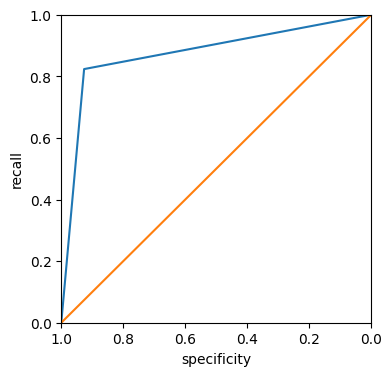

In [284]:
from sklearn.metrics import roc_curve as roc_curve

def binaryize(inlist):
    for i in range(len(inlist)):
        if inlist[i] == 'Outgroup':
            inlist[i] = 0
        if inlist[i] == 'PD_Screen':
            inlist[i] = 1
    return inlist

y_test_binary = binaryize(y_test.tolist())
y_pred_binary = binaryize(y_pred)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary, pos_label=1)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1-fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4,4), legend=False)
ax.set_ylim(0,1)
ax.set_xlim(1,0)
ax.plot((1,0),(0,1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')

In [285]:
from sklearn.metrics import roc_auc_score 

print(np.sum(roc_df.recall[:-1]*np.diff(1-roc_df.specificity)))
print(roc_auc_score([1 if yi == 1 else 0 for yi in y_test_binary],
                    y_pred_binary))

0.7628482972136222
0.874922600619195


## Backward Feature Elimination

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def backward_feature_elimination(X_train, X_test, y_train, y_test, model):
    """
    Backward Feature Elimination
    """
    sselected_features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
# 10 features: 0.8449612403100775
# 7 features: 0.8449612403100775 <--- 7 features sweet spot
# 6 features: 0.8294573643410853
    while len(sselected_features) > 6:
        current_score = 0
        worst_feature = None

        for feature in sselected_features:
            remaining_features = [f for f in sselected_features if f != feature]
            model.fit(X_train[:, remaining_features], y_train)
            y_pred = model.predict(X_test[:, remaining_features])
            score = accuracy_score(y_test, y_pred)

            if score > current_score:
                current_score = score
                worst_feature = feature

        if worst_feature is not None:
            sselected_features.remove(worst_feature)
        else:
            break

    return sselected_features

# Generating a sample dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_train.shape)
# Using a simple classifier like RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Performing Backward Feature Elimination (BFE)
sselected_features = backward_feature_elimination(X_train, X_test, y_train, y_test, model)

print("Selected feature indices:", sselected_features)
print("Selected features:", X.columns[sselected_features])

# Optionally, you can train a model on the selected features
model.fit(X_train[:, sselected_features], y_train)
y_pred = model.predict(X_test[:, sselected_features])

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Selected feature indices: [3, 8, 14, 15, 17, 18]
Selected features: Index(['Instantaneous Speed', 'Kink', 'Final Response Duration',
       'Final Response Probability', 'Habituation of Response Duration',
       'Habituation of Respones Probability'],
      dtype='object')
Accuracy on the test set: 0.8294573643410853


## Recursive Feature Elimination

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Generating a sample dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Using a simple classifier like RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Performing Recursive Feature Elimination (RFE)
num_features_to_select = 5  # Choose the number of features to select
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Displaying selected feature indices
selected_features = [i for i in range(len(rfe.support_)) if rfe.support_[i]]
print("Selected feature indices:", selected_features)
print("Selected feature indices:", X.columns[selected_features])

# Optionally, you can train a model on the selected features
model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Selected feature indices: [6, 7, 8, 14, 18]
Selected feature indices: Index(['Bias', 'Aspect Ratio', 'Kink', 'Final Response Duration',
       'Habituation of Respones Probability'],
      dtype='object')
Accuracy on the test set: 0.8062015503875969


# Now Performing Clustering Of PD_Screen Only for Profile Sub-types

In [81]:
# print(tstat_gene.shape)
# print(tstat_gene.columns)
# print(tstat_gene.Screen.unique())
# print(tstat_gene.Gene[tstat_gene.Screen == "PD_Screen"])
PD_Screen = tstat_gene[tstat_gene.Screen == "PD_Screen"].reset_index().drop(columns=['index'])
PD_Screen

Gene     Width    Length      Area  Instantaneous Speed  \
0    C29E4.10 -0.647055 -0.185658 -0.439891             0.902499   
1    F32D8.13  0.777410  0.113354  0.436028            -0.246369   
2     F53B2.5 -0.301572 -0.184646 -0.406214             2.560500   
3    F54B11.5 -0.833726 -0.436230 -0.755943             0.667368   
4     F55C5.7 -0.735903 -1.264234 -0.681969            -0.386983   
..        ...       ...       ...       ...                  ...   
110    smrc-1 -0.508011 -0.045911 -0.141851             0.124478   
111     ubh-1 -0.166262 -0.319823 -0.247414            -0.763545   
112     ubh-2 -0.266350 -0.310579 -0.447278            -1.646930   
113     ubh-3 -0.668687 -0.423889 -0.774589            -1.331446   
114    unc-70  1.853241 -2.494818 -1.992777            -0.336292   

     Interval Speed  Angular Speed      Bias  Aspect Ratio      Kink  ...  \
0          0.928335       1.204435  1.017620     -0.249281 -0.597715  ...   
1         -0.123728      -0.476608 -0.002676     -0.013489 -0.149009  ...   
2          1.611415       2.544994  2.637826      0.616906  0.196222  ...   
3          0.703403       0.875220  0.711684     -0.417555 -0.372645  ...   
4         -0.730350      -0.194881  0.192844     -0.376255 -0.629048  ...   
..              ...            ...       ...           ...       ...  ...   
110        0.004395       0.099719  0.179691     -0.371002 -0.611455  ...   
111       -0.932989      -0.574298 -0.407735      0.018780  0.023788  ...   
112       -2.002079      -1.378958 -1.420836     -0.493602 -0.369114  ...   
113       -1.290005      -1.086055 -1.087203     -0.550954 -0.253024  ...   
114       -1.886487       3.167204  0.183506      4.514607  4.295249  ...   

     Final Response Duration  Final Response Probability  \
0                  -1.973002                   -0.538532   
1                   0.196056                   -0.567687   
2                   1.398358                   -0.149340   
3                  -0.094378                   -1.292243   
4                   0.393475                    2.865312   
..                       ...                         ...   
110                -0.557210                    1.598069   
111                 0.757095                    0.476468   
112                 0.119256                    0.953872   
113                -1.168823                    0.308447   
114                 1.502162                   -1.325651   

     Final Response Speed  Habituation of Response Duration  \
0               -0.441958                          0.089889   
1                0.251047                          0.357877   
2               -0.141870                          0.151822   
3                0.214204                         -0.199469   
4               -0.443459                          1.819301   
..                    ...                               ...   
110              0.152306                         -0.374855   
111             -0.235888                         -0.579597   
112             -0.211999                         -0.116123   
113             -0.184983                          0.562537   
114             -4.555590                         -0.307415   

     Habituation of Respones Probability  Habituation of Response Speed  \
0                              -1.065384                       0.992830   
1                               0.811631                      -0.894162   
2                               0.550300                       2.532725   
3                              -0.766943                       0.753337   
4                              -1.971032                      -0.075419   
..                                   ...                            ...   
110                            -0.930595                      -0.326084   
111                            -0.525665                      -1.455721   
112                            -1.238908                      -2.487642   
113                            -0.64647

In [82]:
print(PD_Screen[PD_Screen.Gene == 'N2'])
PD_Screen = PD_Screen.drop([5,93])
print(PD_Screen[PD_Screen.Gene == 'N2'])

   Gene  Width  Length  Area  Instantaneous Speed  Interval Speed  \
5    N2    0.0     0.0   0.0                  0.0             0.0   
93   N2    0.0     0.0   0.0                  0.0             0.0   

    Angular Speed  Bias  Aspect Ratio  Kink  ...  Final Response Duration  \
5             0.0   0.0           0.0   0.0  ...                      0.0   
93            0.0   0.0           0.0   0.0  ...                      0.0   

    Final Response Probability  Final Response Speed  \
5                          0.0                   0.0   
93                         0.0                   0.0   

    Habituation of Response Duration  Habituation of Respones Probability  \
5                                0.0                                  0.0   
93                               0.0                                  0.0   

    Habituation of Response Speed  Spontaneous Recovery of Response Duration  \
5                             0.0                                        0.0   

In [83]:
# PD_Screen = PD_Screen.drop(columns=['index']).dropna()
PD_Screen = PD_Screen.dropna().reset_index()
PD_Screen

index      Gene     Width    Length      Area  Instantaneous Speed  \
0        0  C29E4.10 -0.647055 -0.185658 -0.439891             0.902499   
1        1  F32D8.13  0.777410  0.113354  0.436028            -0.246369   
2        2   F53B2.5 -0.301572 -0.184646 -0.406214             2.560500   
3        3  F54B11.5 -0.833726 -0.436230 -0.755943             0.667368   
4        4   F55C5.7 -0.735903 -1.264234 -0.681969            -0.386983   
..     ...       ...       ...       ...       ...                  ...   
108    110    smrc-1 -0.508011 -0.045911 -0.141851             0.124478   
109    111     ubh-1 -0.166262 -0.319823 -0.247414            -0.763545   
110    112     ubh-2 -0.266350 -0.310579 -0.447278            -1.646930   
111    113     ubh-3 -0.668687 -0.423889 -0.774589            -1.331446   
112    114    unc-70  1.853241 -2.494818 -1.992777            -0.336292   

     Interval Speed  Angular Speed      Bias  Aspect Ratio  ...  \
0          0.928335       1.204435  1.017620     -0.249281  ...   
1         -0.123728      -0.476608 -0.002676     -0.013489  ...   
2          1.611415       2.544994  2.637826      0.616906  ...   
3          0.703403       0.875220  0.711684     -0.417555  ...   
4         -0.730350      -0.194881  0.192844     -0.376255  ...   
..              ...            ...       ...           ...  ...   
108        0.004395       0.099719  0.179691     -0.371002  ...   
109       -0.932989      -0.574298 -0.407735      0.018780  ...   
110       -2.002079      -1.378958 -1.420836     -0.493602  ...   
111       -1.290005      -1.086055 -1.087203     -0.550954  ...   
112       -1.886487       3.167204  0.183506      4.514607  ...   

     Final Response Duration  Final Response Probability  \
0                  -1.973002                   -0.538532   
1                   0.196056                   -0.567687   
2                   1.398358                   -0.149340   
3                  -0.094378                   -1.292243   
4                   0.393475                    2.865312   
..                       ...                         ...   
108                -0.557210                    1.598069   
109                 0.757095                    0.476468   
110                 0.119256                    0.953872   
111                -1.168823                    0.308447   
112                 1.502162                   -1.325651   

     Final Response Speed  Habituation of Response Duration  \
0               -0.441958                          0.089889   
1                0.251047                          0.357877   
2               -0.141870                          0.151822   
3                0.214204                         -0.199469   
4               -0.443459                          1.819301   
..                    ...                               ...   
108              0.152306                         -0.374855   
109             -0.235888                         -0.579597   
110             -0.211999                         -0.116123   
111             -0.184983                          0.562537   
112             -4.555590                         -0.307415   

     Habituation of Respones Probability  Habituation of Response Speed  \
0                              -1.065384                       0.992830   
1                               0.811631                      -0.894162   
2                               0.550300                       2.532725   
3                              -0.766943                       0.753337   
4                              -1.971032                      -0.075419   
..                                   ...                            ...   
108                            -0.930595                      -0.326084   
109                            -0.525665                      -1.455721   
110                            -1.238908                      -2.487642   
111                            -0.646475                      -2.000759

In [84]:
DOP_Genes
PD_Screen['Gene']

0      C29E4.10
1      F32D8.13
2       F53B2.5
3      F54B11.5
4       F55C5.7
         ...   
108      smrc-1
109       ubh-1
110       ubh-2
111       ubh-3
112      unc-70
Name: Gene, Length: 113, dtype: object

In [85]:
for i in range(len(PD_Screen)):
    if PD_Screen.loc[i, "Gene"] in DOP_Genes:
        PD_Screen = PD_Screen.drop([i])
PD_Screen = PD_Screen.reset_index()

In [86]:
PD_Screen

level_0  index      Gene     Width    Length      Area  \
0          0      0  C29E4.10 -0.647055 -0.185658 -0.439891   
1          1      1  F32D8.13  0.777410  0.113354  0.436028   
2          2      2   F53B2.5 -0.301572 -0.184646 -0.406214   
3          3      3  F54B11.5 -0.833726 -0.436230 -0.755943   
4          4      4   F55C5.7 -0.735903 -1.264234 -0.681969   
..       ...    ...       ...       ...       ...       ...   
102      108    110    smrc-1 -0.508011 -0.045911 -0.141851   
103      109    111     ubh-1 -0.166262 -0.319823 -0.247414   
104      110    112     ubh-2 -0.266350 -0.310579 -0.447278   
105      111    113     ubh-3 -0.668687 -0.423889 -0.774589   
106      112    114    unc-70  1.853241 -2.494818 -1.992777   

     Instantaneous Speed  Interval Speed  Angular Speed      Bias  ...  \
0               0.902499        0.928335       1.204435  1.017620  ...   
1              -0.246369       -0.123728      -0.476608 -0.002676  ...   
2               2.560500        1.611415       2.544994  2.637826  ...   
3               0.667368        0.703403       0.875220  0.711684  ...   
4              -0.386983       -0.730350      -0.194881  0.192844  ...   
..                   ...             ...            ...       ...  ...   
102             0.124478        0.004395       0.099719  0.179691  ...   
103            -0.763545       -0.932989      -0.574298 -0.407735  ...   
104            -1.646930       -2.002079      -1.378958 -1.420836  ...   
105            -1.331446       -1.290005      -1.086055 -1.087203  ...   
106            -0.336292       -1.886487       3.167204  0.183506  ...   

     Final Response Duration  Final Response Probability  \
0                  -1.973002                   -0.538532   
1                   0.196056                   -0.567687   
2                   1.398358                   -0.149340   
3                  -0.094378                   -1.292243   
4                   0.393475                    2.865312   
..                       ...                         ...   
102                -0.557210                    1.598069   
103                 0.757095                    0.476468   
104                 0.119256                    0.953872   
105                -1.168823                    0.308447   
106                 1.502162                   -1.325651   

     Final Response Speed  Habituation of Response Duration  \
0               -0.441958                          0.089889   
1                0.251047                          0.357877   
2               -0.141870                          0.151822   
3                0.214204                         -0.199469   
4               -0.443459                          1.819301   
..                    ...                               ...   
102              0.152306                         -0.374855   
103             -0.235888                         -0.579597   
104             -0.211999                         -0.116123   
105             -0.184983                          0.562537   
106             -4.555590                         -0.307415   

     Habituation of Respones Probability  Habituation of Response Speed  \
0                              -1.065384                       0.992830   
1                               0.811631                      -0.894162   
2                               0.550300                       2.532725   
3                              -0.766943                       0.753337   
4                              -1.971032                      -0.075419   
..                                   ...                            ...   
102                            -0.930595                      -0.326084   
103                            -0.525665                      -1.455721   
104                            -1.238908                      -2.487642   
105                            -0.646475                      -2.000759   
106                            -3.770454                

In [87]:
X.columns[selected_features]
# selected_features

Index(['Angular Speed', 'Bias', 'Kink', 'Initial Response Speed',
       'Final Response Speed'],
      dtype='object')

In [88]:
PD_Screen1 = PD_Screen[['Gene','Angular Speed', 'Bias', 'Kink', 'Initial Response Speed',
       'Final Response Speed']]

PD_Screen1

Gene  Angular Speed      Bias      Kink  Initial Response Speed  \
0    C29E4.10       1.204435  1.017620 -0.597715                0.364692   
1    F32D8.13      -0.476608 -0.002676 -0.149009               -0.432684   
2     F53B2.5       2.544994  2.637826  0.196222                1.192820   
3    F54B11.5       0.875220  0.711684 -0.372645                0.368981   
4     F55C5.7      -0.194881  0.192844 -0.629048               -0.567830   
..        ...            ...       ...       ...                     ...   
102    smrc-1       0.099719  0.179691 -0.611455                0.030500   
103     ubh-1      -0.574298 -0.407735  0.023788               -1.229469   
104     ubh-2      -1.378958 -1.420836 -0.369114               -1.787756   
105     ubh-3      -1.086055 -1.087203 -0.253024               -1.265882   
106    unc-70       3.167204  0.183506  4.295249               -4.387029   

     Final Response Speed  
0               -0.441958  
1                0.251047  
2               -0.141870  
3                0.214204  
4               -0.443459  
..                    ...  
102              0.152306  
103             -0.235888  
104             -0.211999  
105             -0.184983  
106             -4.555590  

[107 rows x 6 columns]

In [89]:
selected_feature_names = PD_Screen1.columns
print(selected_feature_names)
print(list(selected_feature_names))
type(list(selected_feature_names))

Index(['Gene', 'Angular Speed', 'Bias', 'Kink', 'Initial Response Speed',
       'Final Response Speed'],
      dtype='object')
['Gene', 'Angular Speed', 'Bias', 'Kink', 'Initial Response Speed', 'Final Response Speed']


list

In [90]:
PD_Screen_Genes=PD_Screen1.pop("Gene")

In [91]:
PD_Screen1

Angular Speed      Bias      Kink  Initial Response Speed  \
0         1.204435  1.017620 -0.597715                0.364692   
1        -0.476608 -0.002676 -0.149009               -0.432684   
2         2.544994  2.637826  0.196222                1.192820   
3         0.875220  0.711684 -0.372645                0.368981   
4        -0.194881  0.192844 -0.629048               -0.567830   
..             ...       ...       ...                     ...   
102       0.099719  0.179691 -0.611455                0.030500   
103      -0.574298 -0.407735  0.023788               -1.229469   
104      -1.378958 -1.420836 -0.369114               -1.787756   
105      -1.086055 -1.087203 -0.253024               -1.265882   
106       3.167204  0.183506  4.295249               -4.387029   

     Final Response Speed  
0               -0.441958  
1                0.251047  
2               -0.141870  
3                0.214204  
4               -0.443459  
..                    ...  
102              0.152306  
103             -0.235888  
104             -0.211999  
105             -0.184983  
106             -4.555590  

[107 rows x 5 columns]

In [92]:
feature_list = ['Angular Speed', 'Bias', 'Kink', 'Initial Response Speed',
       'Final Response Speed']

## K Means Clustering

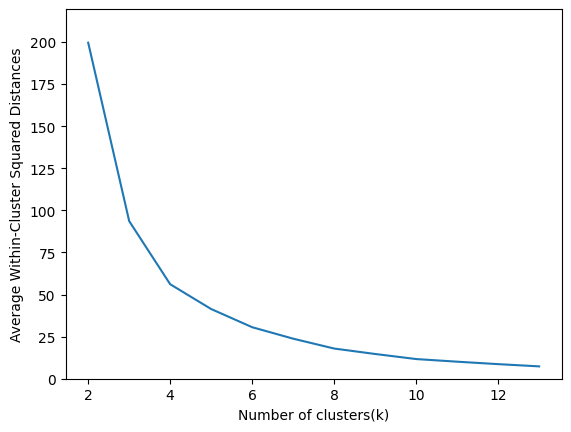

In [94]:
from sklearn.cluster import KMeans
inertia = []
for n_clusters in range(2,14):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0).fit(PD_Screen1)
    inertia.append(kmeans.inertia_ / n_clusters)

inertias = pd.DataFrame({'n_clusters': range(2,14), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0,1.1*inertias.inertia.max()))
ax.legend().set_visible(False)

In [95]:

kmeans = KMeans(n_clusters=4, n_init='auto',random_state=0).fit(PD_Screen1)

In [96]:
PD_Screen1['cluster'] = kmeans.labels_
PD_Screen1.head()

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_82731/398120266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PD_Screen1['cluster'] = kmeans.labels_


Angular Speed      Bias      Kink  Initial Response Speed  \
0       1.204435  1.017620 -0.597715                0.364692   
1      -0.476608 -0.002676 -0.149009               -0.432684   
2       2.544994  2.637826  0.196222                1.192820   
3       0.875220  0.711684 -0.372645                0.368981   
4      -0.194881  0.192844 -0.629048               -0.567830   

   Final Response Speed  cluster  
0             -0.441958        1  
1              0.251047        1  
2             -0.141870        3  
3              0.214204        1  
4             -0.443459        1

In [97]:
kmeans.labels_

array([1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 0, 0, 2, 3, 1, 1,
       3, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 3, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 3, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 1, 1, 0, 0, 0, 2],
      dtype=int32)

In [98]:
kmeans.cluster_centers_

array([[-0.40304339, -0.72478151, -0.42089365, -0.94311735, -0.79262698],
       [ 0.29273618,  0.17498399, -0.06555694, -0.04558717, -0.09295608],
       [ 1.21107975,  0.19494229,  1.65597876, -2.66182563, -2.7258569 ],
       [ 2.01162176,  2.34070036,  0.5561093 ,  0.96961679, -0.57292047]])

In [99]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_list)
centers

Angular Speed      Bias      Kink  Initial Response Speed  \
0      -0.403043 -0.724782 -0.420894               -0.943117   
1       0.292736  0.174984 -0.065557               -0.045587   
2       1.211080  0.194942  1.655979               -2.661826   
3       2.011622  2.340700  0.556109                0.969617   

   Final Response Speed  
0             -0.792627  
1             -0.092956  
2             -2.725857  
3             -0.572920

In [102]:
from collections import Counter
kmeans_counter=Counter(kmeans.labels_)
kmeans_counter

Counter({1: 45, 0: 45, 2: 9, 3: 8})

In [103]:
kmeans.labels_

array([1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 0, 0, 2, 3, 1, 1,
       3, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 3, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 3, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 1, 1, 0, 0, 0, 2],
      dtype=int32)

In [104]:
kmeans.n_features_in_

5

In [105]:
import matplotlib.pyplot as plt

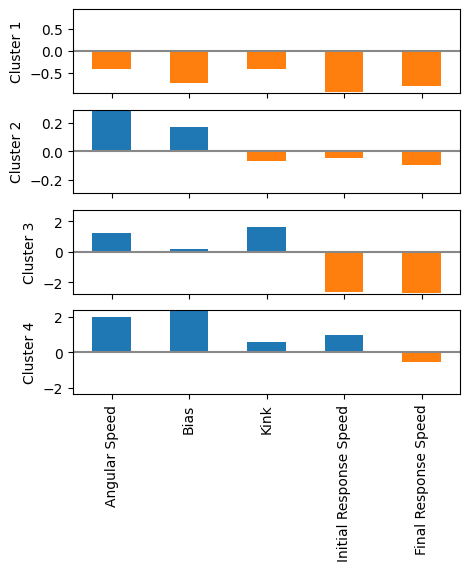

In [106]:
centers = pd.DataFrame(kmeans.cluster_centers_,columns=feature_list)

f,axes = plt.subplots(4,1, figsize=(5,5), sharex=True)
for i,ax in enumerate(axes):
    center = centers.loc[i,:]
    maxPC = 1.01*np.max(np.max(np.abs(center)))
    colors=['C0' if l>0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i+1}')
    ax.set_ylim(-maxPC, maxPC)

In [107]:
centers

Angular Speed      Bias      Kink  Initial Response Speed  \
0      -0.403043 -0.724782 -0.420894               -0.943117   
1       0.292736  0.174984 -0.065557               -0.045587   
2       1.211080  0.194942  1.655979               -2.661826   
3       2.011622  2.340700  0.556109                0.969617   

   Final Response Speed  
0             -0.792627  
1             -0.092956  
2             -2.725857  
3             -0.572920

In [121]:
PD_Screen_Genes

0      C29E4.10
1      F32D8.13
2       F53B2.5
3      F54B11.5
4       F55C5.7
         ...   
102      smrc-1
103       ubh-1
104       ubh-2
105       ubh-3
106      unc-70
Name: Gene, Length: 107, dtype: object

In [122]:
PD_Screen_PCA = PD_Screen[['Angular Speed', 'Bias', 'Kink', 'Initial Response Speed','Final Response Speed']]
PD_Screen_PCA = pd.concat([PD_Screen_PCA, centers], ignore_index=True)

Cluster_labels = pd.Series(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

PD_Screen_PCA_labels = pd.concat([PD_Screen_Genes, Cluster_labels], ignore_index=True)

print(PD_Screen_PCA.to_string())
print(PD_Screen_PCA_labels.to_string())

     Angular Speed      Bias      Kink  Initial Response Speed  Final Response Speed
0         1.204435  1.017620 -0.597715                0.364692             -0.441958
1        -0.476608 -0.002676 -0.149009               -0.432684              0.251047
2         2.544994  2.637826  0.196222                1.192820             -0.141870
3         0.875220  0.711684 -0.372645                0.368981              0.214204
4        -0.194881  0.192844 -0.629048               -0.567830             -0.443459
5         0.781983  0.411728  0.770279                0.027378             -0.785603
6        -0.135628 -0.417237 -0.749175               -0.098735             -1.561896
7         0.514285  0.502154 -0.977184                1.324903              0.471669
8         0.104489  0.021153 -0.487370                0.501077             -0.244955
9        -0.273864  0.726390 -0.173583               -0.259683             -0.737660
10        0.234310  0.061017  0.318159               -0.333835   

In [123]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(PD_Screen_PCA)

In [124]:
df_PCA = pd.DataFrame({'PCA_x':reduced_data[:,0],'PCA_y':reduced_data[:,1]})
df_PCA_dropped = df_PCA.iloc[:-4]
df_clusters = df_PCA.tail(4).reset_index()
print(df_PCA_dropped.to_string())
print(df_clusters)

        PCA_x     PCA_y
0   -0.422376  1.560874
1   -0.929189 -0.130280
2    0.077690  3.914444
3   -0.847317  1.375572
4   -0.580628 -0.162479
5    0.438184  0.987943
6   -0.259472 -0.535326
7   -1.933748  1.463259
8   -1.055972  0.485465
9   -0.287085  0.315564
10   0.083748  0.231350
11  -0.645765  0.888221
12  -0.703887  1.156955
13  -0.205148 -0.500683
14   3.199448  4.650436
15   0.164715  1.273472
16   0.134648 -1.728132
17   0.572004 -1.371089
18   2.550375 -2.269288
19   1.375681  2.921210
20  -0.391945  0.342379
21   0.148492  0.611737
22  -0.342522  2.029582
23  -0.096624  1.758656
24  -0.964912 -1.101990
25  -0.957455 -0.904041
26  -1.902647  0.122464
27  -1.004676 -1.023769
28  -1.216651  1.927438
29   0.688841 -1.271481
30  -0.904002 -1.838591
31   0.431706  0.034067
32   0.807416 -0.772595
33  -1.083599 -0.947218
34  -0.456047  2.259468
35   0.684664 -2.059703
36  -0.974946 -0.864777
37  -0.407088  0.086566
38  -1.413586 -0.352160
39  -1.675483  0.667283
40  -0.135473 -0

In [125]:
# df_PCA = pd.DataFrame({'PCA_x':reduced_data[:,0],'PCA_y':reduced_data[:,1]})
df_PCA_dropped['KMeans'] = kmeans.labels_
# df_PCA['KMeans_PCA'] = kmeans_PCA.labels_
df_PCA_dropped['Gene'] = PD_Screen_Genes.reset_index().drop(columns=['index'])
df_PCA_dropped

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_82731/350561850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PCA_dropped['KMeans'] = kmeans.labels_
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_82731/350561850.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PCA_dropped['Gene'] = PD_Screen_Genes.reset_index().drop(columns=['index'])


PCA_x     PCA_y  KMeans      Gene
0   -0.422376  1.560874       1  C29E4.10
1   -0.929189 -0.130280       1  F32D8.13
2    0.077690  3.914444       3   F53B2.5
3   -0.847317  1.375572       1  F54B11.5
4   -0.580628 -0.162479       1   F55C5.7
..        ...       ...     ...       ...
102 -1.109885  0.405889       1    smrc-1
103 -0.244804 -0.898635       0     ubh-1
104 -0.596513 -2.309334       0     ubh-2
105 -0.662723 -1.657639       0     ubh-3
106  7.484096 -0.178596       2    unc-70

[107 rows x 4 columns]

In [136]:
df_clusters['Clusters'] = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
df_clusters

index     PCA_x     PCA_y   Clusters
0    107 -0.262136 -1.067743  Cluster 1
1    108 -0.574232  0.523290  Cluster 2
2    109  3.484466 -0.482911  Cluster 3
3    110  0.403142  3.319329  Cluster 4

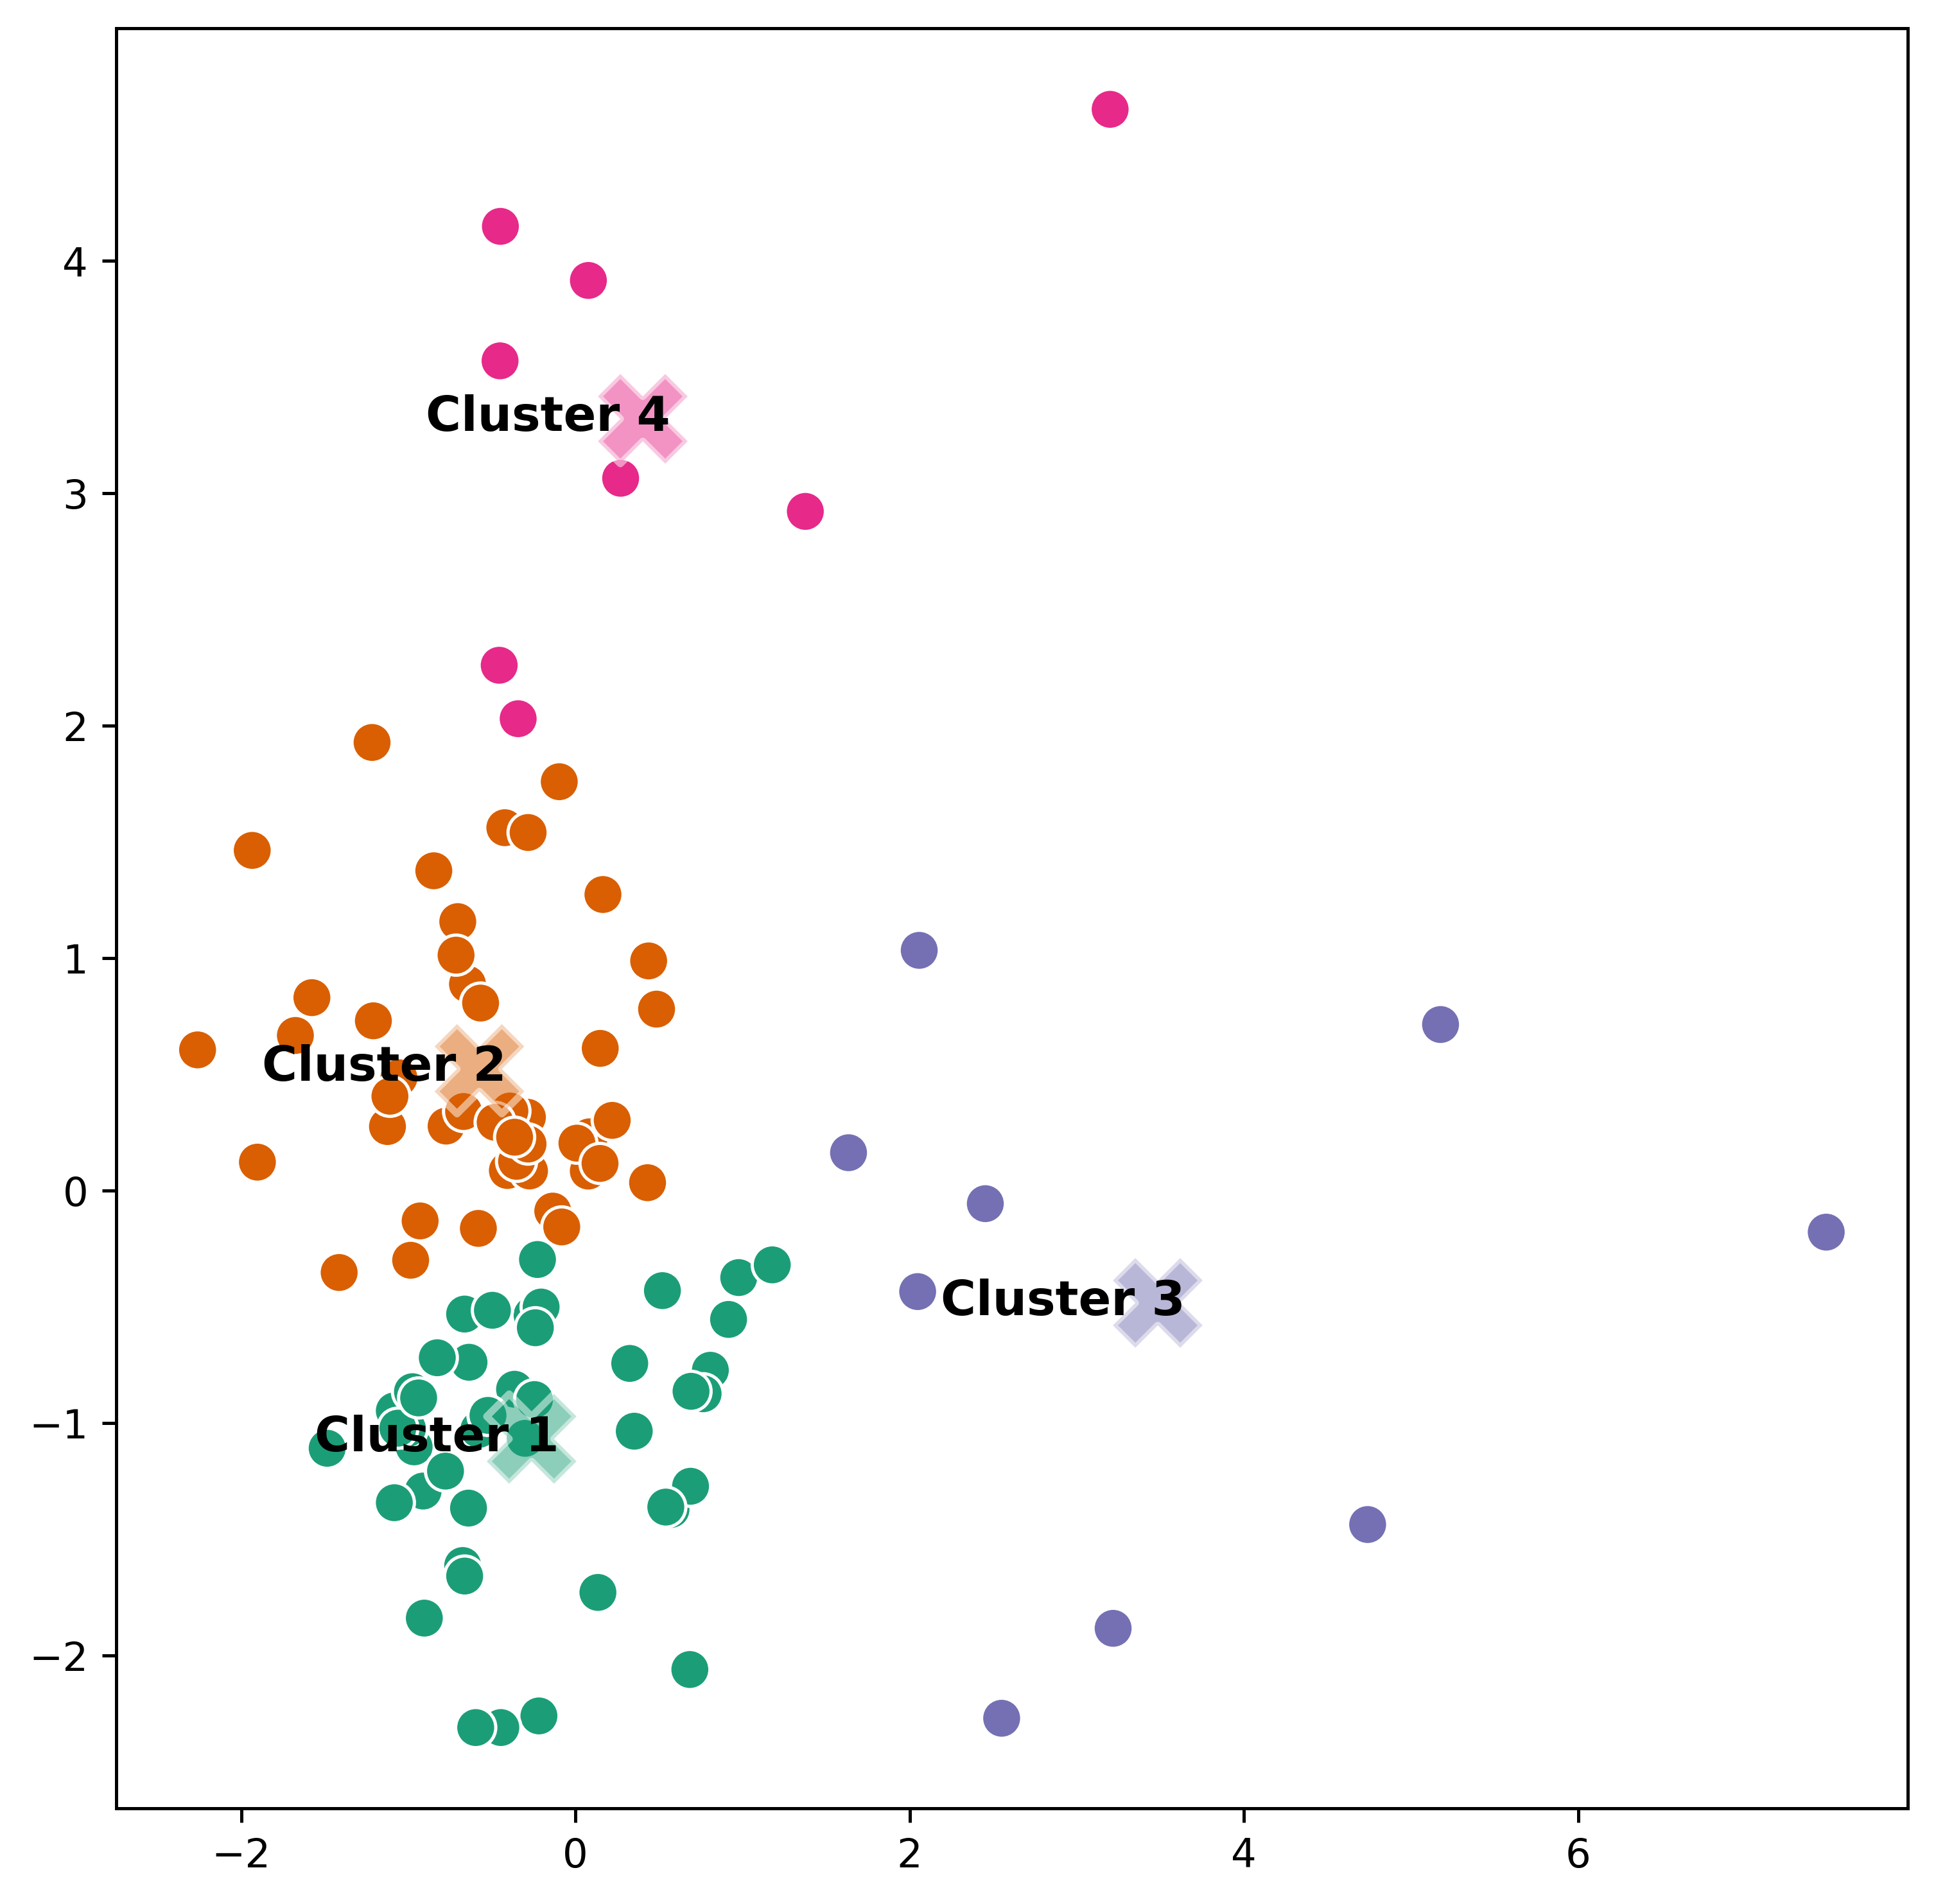

In [138]:
fig, axs = plt.subplots(figsize=(8, 8), dpi=450)

sns.scatterplot(data=df_PCA_dropped, x="PCA_x", y="PCA_y", hue="KMeans", legend=False, palette = ["#1b9e77","#d95f02","#7570b3","#e7298a"], s=100)

def label_marker(x, y, val, ax, markersize):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+0.05, point['y']-0.05, str(point['val']), fontsize = markersize, weight='bold')

# label_marker(df_PCA_dropped.PCA_x, df_PCA_dropped.PCA_y, df_PCA_dropped.Gene, plt.gca(), 'x-small') 

# sns.scatterplot(data=df_PCA_others, x="PCA_x", y="PCA_y", c='k',legend=False, alpha = 0.2)

sns.scatterplot(data=df_clusters, x="PCA_x", y="PCA_y", hue="Clusters", legend=False, palette = ["#1b9e77","#d95f02","#7570b3","#e7298a"], marker='X',s=500, alpha = 0.5)
# 

def label_point(x, y, val, ax, markersize):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-1.3, point['y']-0.05, str(point['val']), fontsize = markersize, weight='bold')
        
label_point(df_clusters.PCA_x, df_clusters.PCA_y, df_clusters.Clusters, plt.gca(), 'large') 

axs.set_title("")
axs.set_xlabel("")
axs.set_ylabel("")



plt.savefig('/Users/Joseph/Desktop/PD_PCA_Cluster_New.png', bbox_inches='tight')
plt.show()



In [520]:
# from plotly.subplots import make_subplots
# import plotly.express as px
# import plotly.graph_objects as go

# fig = make_subplots(cols=2, rows=2,
#                     specs=[[{"type": "polar"} for _ in range(2)] for _ in range(2)],
#                     # subplot_titles=("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5")
#                    )


# fig.add_trace(
#     go.Scatterpolar(r = centers.iloc[0], theta = centers.columns, fill="toself",name="(Cluster 1)"),
#     row=1, col=1
# )


# fig.add_trace(
#     go.Scatterpolar(r = centers.iloc[1], theta = centers.columns, fill="toself",name="(Cluster 2)"),
#     row=1, col=2
# )

# fig.add_trace(
#     go.Scatterpolar(r = centers.iloc[2], theta = centers.columns, fill="toself",name="(Cluster 3)"),
#     row=2, col=1
# )

# fig.add_trace(
#     go.Scatterpolar(r = centers.iloc[3], theta = centers.columns, fill="toself",name="(Cluster 4)"),
#     row=2, col=2
# )



# fig.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True
#     ),
#   ),
#   showlegend=False
# )

# fig.update_layout(height=1500, width=1000, template='plotly_dark',title_text="5 'Profiles' associated with PD genotype")
# fig.update_polars(radialaxis=dict(range=[-3, 3]))
# fig.show()

In [109]:
# centers.loc[row].values.flatten().tolist()
print(list(centers)[0:])
cols=feature_list
centers=centers[cols]
centers

['Angular Speed', 'Bias', 'Kink', 'Initial Response Speed', 'Final Response Speed']


Angular Speed      Bias      Kink  Initial Response Speed  \
0      -0.403043 -0.724782 -0.420894               -0.943117   
1       0.292736  0.174984 -0.065557               -0.045587   
2       1.211080  0.194942  1.655979               -2.661826   
3       2.011622  2.340700  0.556109                0.969617   

   Final Response Speed  
0             -0.792627  
1             -0.092956  
2             -2.725857  
3             -0.572920

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_82731/2673795210.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("tab10", len(centers.index))


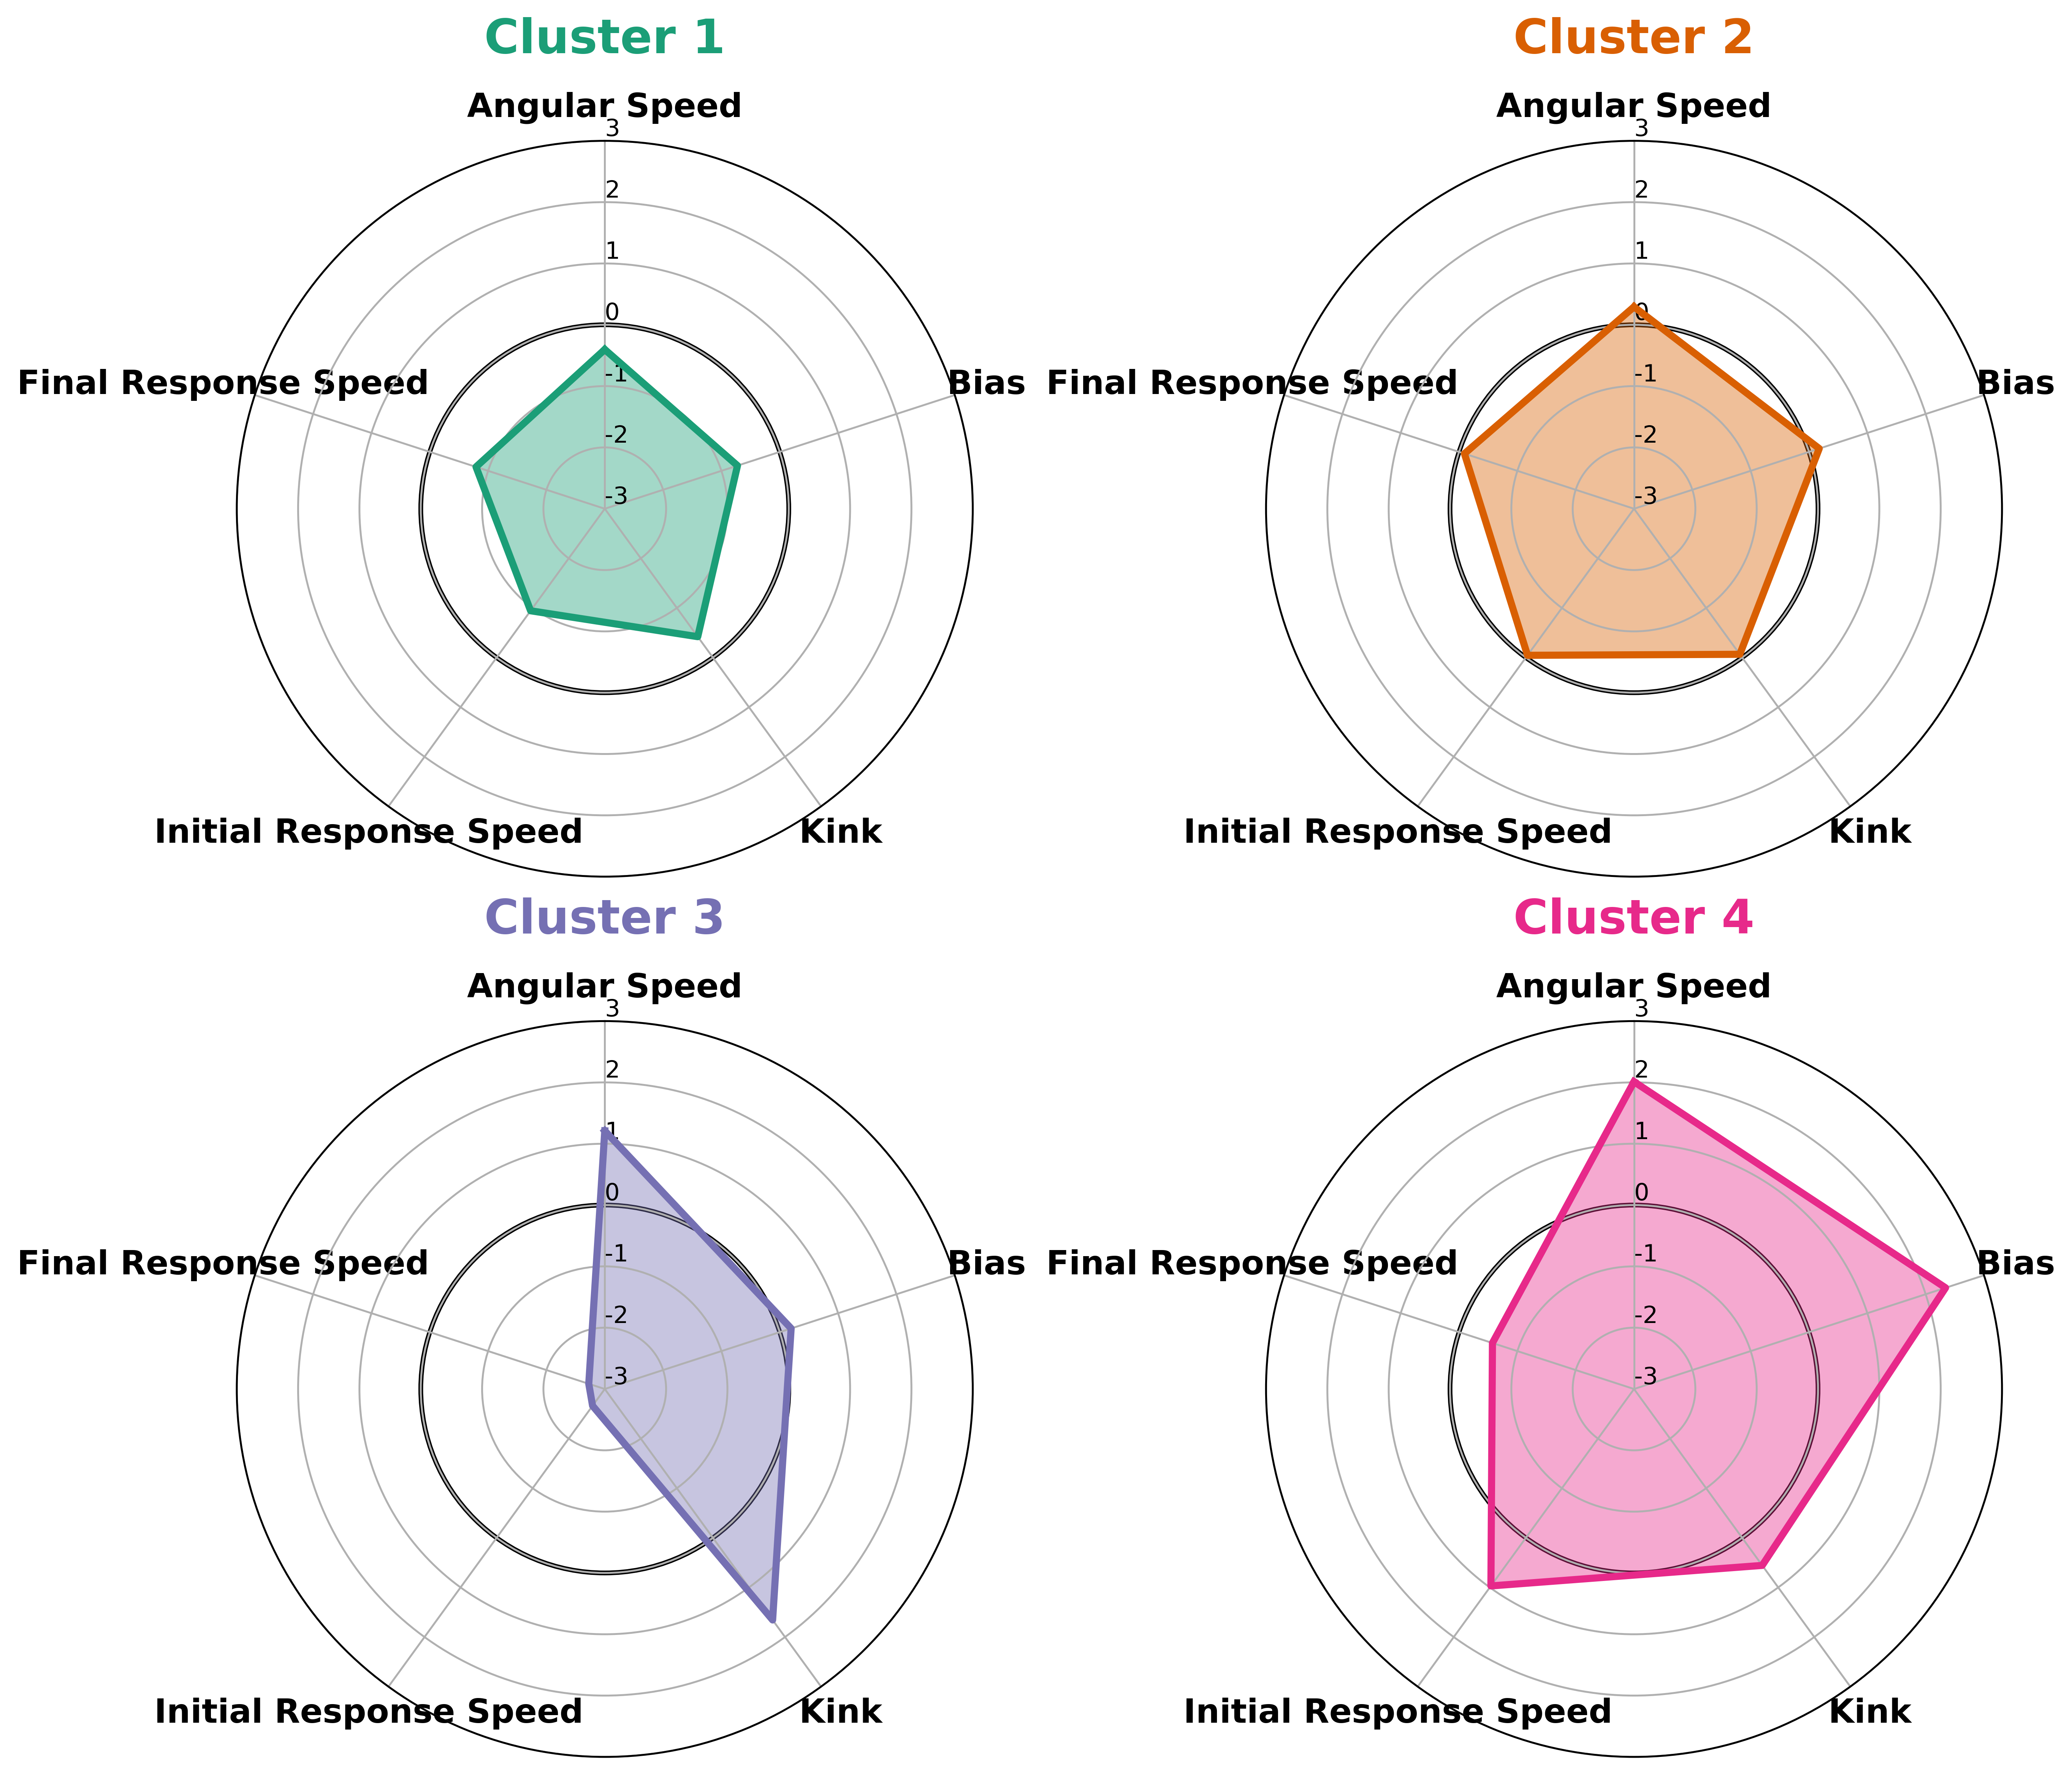

In [120]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import matplotlib
import pylab as pl 
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider(row, title, color):

    # number of variable
    categories=list(centers)[0:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='k', size=14, weight = 'bold')

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5], ["-5","-4","-3","-2","-1","0","1","2","3","4","5"], color="k", size=10)
    plt.ylim(-3,3)


    # Add a dark circle at 0 for N2
    circle = pl.Circle((0, 0), 3, transform=ax.transData._b, color="k", linewidth=2,fill = False)
    ax.add_artist(circle)

    
    # Ind1
    values=centers.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=3, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)


    
    # Add a title
    plt.title(title, size=20, color=color, y=1.1, weight='bold')

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=450
plt.figure(figsize=(12, 12), dpi=my_dpi, layout='compressed')
# Create a color palette:
my_palette = plt.cm.get_cmap("tab10", len(centers.index))
 
# Loop to plot
colors=["#1b9e77","#d95f02","#7570b3","#e7298a"]
for row in range(0, len(centers.index)):
    make_spider(row=row, title='Cluster '+str(centers.index[row]+1), color=colors[row])
plt.savefig('/Users/Joseph/Desktop/PD_ClusterProfiles.png', bbox_inches='tight')
plt.show()

## Plotting Individual Genotypes

In [139]:
PD_Screen_plot = PD_Screen[['Gene','Angular Speed', 'Bias', 'Kink', 'Initial Response Speed', 'Final Response Speed']]

cols=['Gene','Angular Speed', 'Bias', 'Kink', 'Initial Response Speed','Final Response Speed']
PD_Screen_plot=PD_Screen_plot[cols]
PD_Screen_plot

Gene  Angular Speed      Bias      Kink  Initial Response Speed  \
0    C29E4.10       1.204435  1.017620 -0.597715                0.364692   
1    F32D8.13      -0.476608 -0.002676 -0.149009               -0.432684   
2     F53B2.5       2.544994  2.637826  0.196222                1.192820   
3    F54B11.5       0.875220  0.711684 -0.372645                0.368981   
4     F55C5.7      -0.194881  0.192844 -0.629048               -0.567830   
..        ...            ...       ...       ...                     ...   
102    smrc-1       0.099719  0.179691 -0.611455                0.030500   
103     ubh-1      -0.574298 -0.407735  0.023788               -1.229469   
104     ubh-2      -1.378958 -1.420836 -0.369114               -1.787756   
105     ubh-3      -1.086055 -1.087203 -0.253024               -1.265882   
106    unc-70       3.167204  0.183506  4.295249               -4.387029   

     Final Response Speed  
0               -0.441958  
1                0.251047  
2               -0.141870  
3                0.214204  
4               -0.443459  
..                    ...  
102              0.152306  
103             -0.235888  
104             -0.211999  
105             -0.184983  
106             -4.555590  

[107 rows x 6 columns]

In [140]:
PD_Screen_cluster = PD_Screen[['Gene','Angular Speed', 'Bias', 'Kink', 'Initial Response Speed', 'Final Response Speed']]
PD_Screen_cluster['cluster'] = kmeans.labels_
PD_Screen_cluster.head()

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_82731/2606611586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PD_Screen_cluster['cluster'] = kmeans.labels_


Gene  Angular Speed      Bias      Kink  Initial Response Speed  \
0  C29E4.10       1.204435  1.017620 -0.597715                0.364692   
1  F32D8.13      -0.476608 -0.002676 -0.149009               -0.432684   
2   F53B2.5       2.544994  2.637826  0.196222                1.192820   
3  F54B11.5       0.875220  0.711684 -0.372645                0.368981   
4   F55C5.7      -0.194881  0.192844 -0.629048               -0.567830   

   Final Response Speed  cluster  
0             -0.441958        1  
1              0.251047        1  
2             -0.141870        3  
3              0.214204        1  
4             -0.443459        1

In [141]:
# cols=['Gene','Habituation of Response Duration','Bias','Final Response Speed','Initial Response Duration','Curve']
# PD_Screen_cluster=PD_Screen_cluster[cols]
# PD_Screen_cluster

In [250]:
PD_Screen_plot['Gene'][0]

PD_Screen_plot.Gene[PD_Screen_plot.Gene == 'C29E4.10'].index

Index([0], dtype='int64')

In [142]:
import ipywidgets as widgets

Gene_Dropdown = widgets.Dropdown(
                    options=list(PD_Screen_plot['Gene']),
                    value=PD_Screen_plot['Gene'][0],
                    description='Gene:',
                    disabled=False,
                )
display(Gene_Dropdown)

Dropdown(description='Gene:', options=('C29E4.10', 'F32D8.13', 'F53B2.5', 'F54B11.5', 'F55C5.7', 'T08G11.1', '…

In [143]:
PD_Screen_cluster.loc[PD_Screen_cluster.Gene[PD_Screen_cluster.Gene == Gene_Dropdown.value].index].values.flatten().tolist()[-1]

1

In [144]:
PD_Screen_plot.loc[PD_Screen_plot.Gene[PD_Screen_plot.Gene == Gene_Dropdown.value].index].values.flatten().tolist()[:]

['pink-1',
 0.08145438845414144,
 0.5690127712434734,
 -0.7366170480542241,
 -0.3204005434626332,
 -0.3520893630447982]

In [530]:

# # number of variable
# categories=list(PD_Screen_plot)[1:]
# N = len(categories)
 
# # We are going to plot the first line of the data frame.
# # But we need to repeat the first value to close the circular graph:
# values=PD_Screen_plot.loc[PD_Screen_plot.Gene[PD_Screen_plot.Gene == Gene_Dropdown.value].index].values.flatten().tolist()[1:]
# values += values[:1]
# values
 
# # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# angles = [n / float(N) * 2 * pi for n in range(N)]
# angles += angles[:1]
 
# # Initialise the spider plot
# ax = plt.subplot(111, polar=True)

# # If you want the first axis to be on top:
# ax.set_theta_offset(pi / 2)
# ax.set_theta_direction(-1)

# # Draw one axe per variable + add labels
# plt.xticks(angles[:-1], categories, color='grey', size=8)



# # Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5], ["-5","-4","-3","-2","-1","0","1","2","3","4","5"], color="grey", size=7)
# plt.ylim(-4,4)
 
# # Plot data
# ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# # Fill area
# ax.fill(angles, values, 'b', alpha=0.2)

# # Show the graph
# plt.show()
# number of variable
    categories=list(centers)[0:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='k', size=14, weight = 'bold')

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5], ["-5","-4","-3","-2","-1","0","1","2","3","4","5"], color="k", size=10)
    plt.ylim(-3,3)


    # Add a dark circle at 0 for N2
    circle = pl.Circle((0, 0), 3, transform=ax.transData._b, color="k", linewidth=2,fill = False)
    ax.add_artist(circle)

    
    # Ind1
    values=centers.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=3, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)


    
    # Add a title
    plt.title(title, size=20, color=color, y=1.1, weight='bold')

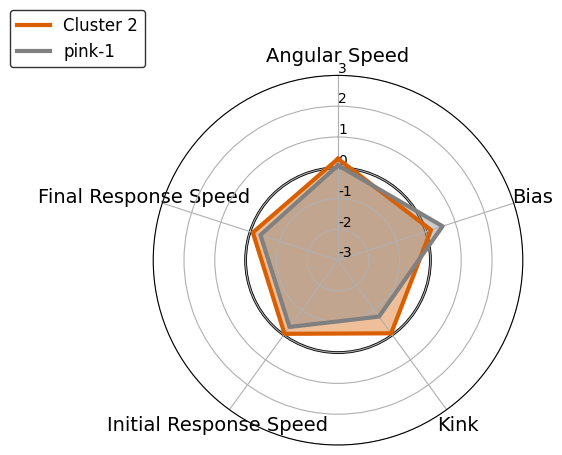

In [167]:
# ------- PART 1: Create background
 
# number of variable
categories=list(PD_Screen_plot)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='k', size=14)

 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5], ["-5","-4","-3","-2","-1","0","1","2","3","4","5"], color="k", size=10)
plt.ylim(-3,3)

# Add a dark circle at 0 for N2
circle = pl.Circle((0, 0), 3, transform=ax.transData._b, color="k", linewidth=2,fill = False)
ax.add_artist(circle)

# ["#1b9e77","#d95f02","#7570b3","#e7298a"]

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
cluster_row = PD_Screen_cluster.loc[PD_Screen_cluster.Gene[PD_Screen_cluster.Gene == Gene_Dropdown.value].index].values.flatten().tolist()[-1]
values=centers.loc[cluster_row].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=3, linestyle='solid', color="#d95f02",label=f"Cluster {cluster_row+1}")
ax.fill(angles, values, "#d95f02", alpha=0.4)
 
# Ind2
values=PD_Screen_plot.loc[PD_Screen_plot.Gene[PD_Screen_plot.Gene == Gene_Dropdown.value].index].values.flatten().tolist()[1:]
values += values[:1]
ax.plot(angles, values, linewidth=3, linestyle='solid', color="grey",label=f"{Gene_Dropdown.value}")
ax.fill(angles, values, "grey", alpha=0.4)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0, 1.2), fontsize='large', edgecolor='inherit')

# Show the graph
# plt.savefig(f'/Users/Joseph/Desktop/{Gene_Dropdown.value}_profilePoster.png', format='png', dpi=450, bbox_inches='tight')
plt.savefig(f'/Users/Joseph/Desktop/{Gene_Dropdown.value}_profilePoster.png', format='png', dpi=450, bbox_inches='tight')
plt.show()
# plt.savefig(f'/Users/Joseph/Desktop/NRSC510B/{Gene_Dropdown.value}_profile.png', format='png', dpi=450, bbox_inches='tight')